In [ ]:
import pandas as pd
import numpy as np
import spacy
import warnings
warnings.filterwarnings('ignore')
noteeventsdf = pd.read_csv('../NOTEEVENTS.CSV')

In [ ]:
dicddiagnoses = pd.read_csv('../D_ICD_DIAGNOSES.CSV')

# Load patients data
# d1 = files.upload()
patients = pd.read_csv('../PATIENTS.csv')

# Load admissions data
# d2 = files.upload()
admissions = pd.read_csv('../ADMISSIONS.csv')

# Load diagnoses_icd data
# d3 = files.upload()
diagnoses = pd.read_csv('../DIAGNOSES_ICD.csv')

# Load D_ICD_DIAGNOSES data
# d4 = files.upload()
diagnoses_labels = pd.read_csv('../D_ICD_DIAGNOSES.csv')

# Load D_LABITEMS data
d_lab_item = pd.read_csv('../D_LABITEMS.csv')

# Load LABEVENTS data
labevents = pd.read_csv('../LABEVENTS.csv')


In [3]:
admissions

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [4]:
admissions[admissions['HADM_ID'] == 145834]

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
212,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1


In [5]:
diagnoses_kidney_failure = pd.merge(diagnoses, diagnoses_labels, on='ICD9_CODE')
diagnoses_kidney_failure = diagnoses_kidney_failure[diagnoses_kidney_failure['LONG_TITLE'].str.contains('kidney failure', case=False)]
# diagnoses_kidney_failure = diagnoses_kidney_failure[diagnoses_kidney_failure['LONG_TITLE'].str.contains('kidney', case=False)]
diagnoses_kidney_failure.sort_values(by=['SUBJECT_ID'])


,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,SHORT_TITLE,LONG_TITLE
590,6,3,145834,3.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
627,45,9,150750,4.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
695,115,21,109451,4.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
881,308,38,185910,4.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
973,404,52,190797,3.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
...,...,...,...,...,...,...,...,...
633423,650939,99982,112748,2.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
631832,650964,99982,183791,5.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
631845,650977,99983,117390,2.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"
631868,651000,99991,151118,4.0,5849,5908,Acute kidney failure NOS,"Acute kidney failure, unspecified"


In [6]:
from datetime import datetime
df = patients
# Calculate age function
def calculate_age(dob, dod):
    if isinstance(dod, str):
        dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
        dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
        age = (dod_date - dob_date).days // 365
        return age
    else:
        return 140

# Apply calculate_age function to create "age" column
df["AGE"] = df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_df = df[df["AGE"] < 120]

In [7]:
filtered_df_kidney_failure = filtered_df[filtered_df['SUBJECT_ID'].isin(diagnoses_kidney_failure['SUBJECT_ID'])]
filtered_df_kidney_failure.sort_values(by=['SUBJECT_ID'])

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
223,2,3,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1,77
229,8,9,M,2108-01-26 00:00:00,2149-11-14 00:00:00,2149-11-14 00:00:00,2149-11-14 00:00:00,1,41
239,18,21,M,2047-04-04 00:00:00,2135-02-08 00:00:00,2135-02-08 00:00:00,2135-02-08 00:00:00,1,87
266,45,52,M,2152-11-26 00:00:00,2192-07-11 00:00:00,NaN,2192-07-11 00:00:00,1,39
282,61,68,F,2132-02-29 00:00:00,2174-02-11 00:00:00,NaN,2174-02-11 00:00:00,1,41
...,...,...,...,...,...,...,...,...,...
40407,46477,99847,F,2115-08-27 00:00:00,2192-02-12 00:00:00,2192-02-12 00:00:00,2192-02-12 00:00:00,1,76
40418,46488,99881,M,2096-04-15 00:00:00,2174-01-22 00:00:00,2174-01-22 00:00:00,2174-01-22 00:00:00,1,77
40420,46490,99893,M,2104-09-12 00:00:00,2193-12-30 00:00:00,NaN,2193-12-30 00:00:00,1,89
40423,46493,99899,M,2026-06-20 00:00:00,2113-06-13 00:00:00,2113-06-13 00:00:00,NaN,1,87


In [8]:
kidneyfailurepatientinfo = pd.merge(admissions, filtered_df_kidney_failure, on='SUBJECT_ID') 
kidneyfailurepatientinfo['DISCHTODEATH'] = 0
kidneyfailurepatientinfo

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,DISCHTODEATH
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,0
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,0
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,0
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,0
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8862,57499,95406,118339,2129-07-12 13:35:00,2129-07-19 06:30:00,2129-07-19 06:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,1,45315,F,2070-03-18 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,1,59,0
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,1,46169,M,2106-03-04 00:00:00,2179-05-04 00:00:00,NaN,2179-05-04 00:00:00,1,73,0
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,1,46186,F,2082-03-31 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,1,53,0
8865,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,1,46202,F,2094-05-01 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,1,77,0


In [9]:
from datetime import datetime
for i in kidneyfailurepatientinfo.index:
    try: 
        d2 = datetime.strptime( kidneyfailurepatientinfo['DOD'][i], '%Y-%m-%d %H:%M:%S')
        d1 = datetime.strptime( kidneyfailurepatientinfo['DISCHTIME'][i], '%Y-%m-%d %H:%M:%S')
        kidneyfailurepatientinfo.loc[i, 'DISCHTODEATH'] = (d2-d1).days
    except: pass
kidneyfailurepatientinfo

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,DISCHTODEATH
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1305
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1009
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,990
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,647
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8862,57499,95406,118339,2129-07-12 13:35:00,2129-07-19 06:30:00,2129-07-19 06:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,1,45315,F,2070-03-18 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,1,59,-1
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,1,46169,M,2106-03-04 00:00:00,2179-05-04 00:00:00,NaN,2179-05-04 00:00:00,1,73,45
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,1,46186,F,2082-03-31 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,1,53,0
8865,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,1,46202,F,2094-05-01 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,1,77,-1


In [434]:
kidneyfailurepatientinfo['SURVIVE30DAYS'] = kidneyfailurepatientinfo['DISCHTODEATH'] > 30
kidneyfailurepatientinfo['SURVIVE365DAYS'] = kidneyfailurepatientinfo['DISCHTODEATH'] > 365
kidneyfailurepatientinfo['SURVIVE15DAYS'] = kidneyfailurepatientinfo['DISCHTODEATH'] > 15
kidneyfailurepatientinfo['SURVIVE60DAYS'] = kidneyfailurepatientinfo['DISCHTODEATH'] > 60
kidneyfailurepatientinfo['SURVIVE90DAYS'] = kidneyfailurepatientinfo['DISCHTODEATH'] > 90
kidneyfailurepatientinfo

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOD_SSN,EXPIRE_FLAG,AGE,DISCHTODEATH,SURVIVE30DAYS,SURVIVE365DAYS,ADMITAGE,SURVIVE15DAYS,SURVIVE60DAYS,SURVIVE90DAYS
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2201-08-02 00:00:00,1,66,1305,True,True,62.753425,True,True,True
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2201-08-02 00:00:00,1,66,1009,True,True,63.408219,True,True,True
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2201-08-02 00:00:00,1,66,990,True,True,63.657534,True,True,True
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2201-08-02 00:00:00,1,66,647,True,True,64.624658,True,True,True
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2201-08-02 00:00:00,1,66,560,True,True,64.794521,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8862,57499,95406,118339,2129-07-12 13:35:00,2129-07-19 06:30:00,2129-07-19 06:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,2129-07-19 00:00:00,1,59,-1,False,False,59.356164,False,False,False
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2179-05-04 00:00:00,1,73,45,True,False,73.016438,True,False,False
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,2136-03-11 00:00:00,1,53,0,False,False,53.953425,False,False,False
8865,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,2172-03-02 00:00:00,1,77,-1,False,False,77.832877,False,False,False


In [11]:
d_lab_item

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [12]:
kidneypatientlabevents = labevents[labevents['subject_id'].isin(diagnoses_kidney_failure['SUBJECT_ID']) ]
kidneypatientlabevents = kidneypatientlabevents[pd.notna(kidneypatientlabevents['hadm_id'])]
kidneypatientlabevents

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
3288,6250013,10019,177759.0,50861,2163-05-14 19:53:00,176,176.00,IU/L,abnormal
3289,6250014,10019,177759.0,50862,2163-05-14 19:53:00,3.2,3.20,g/dL,abnormal
3290,6250015,10019,177759.0,50863,2163-05-14 19:53:00,487,487.00,IU/L,abnormal
3291,6250016,10019,177759.0,50866,2163-05-14 19:53:00,507,507.00,umol/L,abnormal
3292,6250017,10019,177759.0,50867,2163-05-14 19:53:00,51,51.00,IU/L,NaN
...,...,...,...,...,...,...,...,...,...
75096,20450341,44222,192189.0,51250,2180-07-20 04:00:00,95,95.00,fL,NaN
75097,20450342,44222,192189.0,51265,2180-07-20 04:00:00,197,197.00,K/uL,NaN
75098,20450343,44222,192189.0,51277,2180-07-20 04:00:00,14.3,14.30,%,NaN
75099,20450344,44222,192189.0,51279,2180-07-20 04:00:00,3.99,3.99,m/uL,abnormal


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print(kidneypatientlabevents['itemid'].value_counts())

itemid
50971    1152
50983    1121
51221    1116
50902    1108
50882    1099
         ... 
51383       1
51384       1
50974       1
50900       1
51247       1
Name: count, Length: 377, dtype: int64


In [14]:
kidneypatientlabevents['itemid'].value_counts()[:10]

itemid
50971    1152
50983    1121
51221    1116
50902    1108
50882    1099
50868    1095
50931    1090
50912    1082
51006    1077
50960    1008
Name: count, dtype: int64

In [15]:
d_lab_item[d_lab_item['ITEMID'] ==50882 ]     

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
209,83,50882,Bicarbonate,Blood,Chemistry,1963-8


In [16]:
from datetime import datetime
for i in kidneyfailurepatientinfo.index:
    try: 
        d2 = datetime.strptime( kidneyfailurepatientinfo['ADMITTIME'][i], '%Y-%m-%d %H:%M:%S')
        d1 = datetime.strptime( kidneyfailurepatientinfo['DOB'][i], '%Y-%m-%d %H:%M:%S')
        kidneyfailurepatientinfo.loc[i, 'ADMITAGE'] = (d2-d1).days / 365
    except: pass
kidneyfailurepatientinfo

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,DISCHTODEATH,SURVIVE30DAYS,SURVIVE365DAYS,ADMITAGE
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1305,True,True,62.753425
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1009,True,True,63.408219
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,990,True,True,63.657534
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,647,True,True,64.624658
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,560,True,True,64.794521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8862,57499,95406,118339,2129-07-12 13:35:00,2129-07-19 06:30:00,2129-07-19 06:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,2070-03-18 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,1,59,-1,False,False,59.356164
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2106-03-04 00:00:00,2179-05-04 00:00:00,NaN,2179-05-04 00:00:00,1,73,45,True,False,73.016438
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,2082-03-31 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,1,53,0,False,False,53.953425
8865,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,2094-05-01 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,1,77,-1,False,False,77.832877


In [17]:
kidneyfailurepatientinfo.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE',
       'DISCHTODEATH', 'SURVIVE30DAYS', 'SURVIVE365DAYS', 'ADMITAGE'],
      dtype='object')

In [18]:
kidneyfailurepatientinfo['DISCHARGE_LOCATION'] == 'DEAD/EXPIRED'

0       False
1       False
2       False
3       False
4       False
        ...  
8862     True
8863    False
8864    False
8865     True
8866    False
Name: DISCHARGE_LOCATION, Length: 8867, dtype: bool

In [19]:

kidneyfailurepatientinfofeatures = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']
kidneyfailurepatientinfofeatures = kidneyfailurepatientinfofeatures[['ADMISSION_TYPE','ADMISSION_LOCATION', 
         'INSURANCE','LANGUAGE', 'RELIGION', 'MARITAL_STATUS',   'ADMITAGE']]
kidneyfailurepatientinfofeatures

,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ADMITAGE
0,EMERGENCY,EMERGENCY ROOM ADMIT,Private,ENGL,NOT SPECIFIED,MARRIED,62.753425
1,EMERGENCY,EMERGENCY ROOM ADMIT,Private,ENGL,NOT SPECIFIED,MARRIED,63.408219
2,EMERGENCY,EMERGENCY ROOM ADMIT,Private,ENGL,NOT SPECIFIED,MARRIED,63.657534
3,EMERGENCY,EMERGENCY ROOM ADMIT,Private,ENGL,NOT SPECIFIED,MARRIED,64.624658
4,EMERGENCY,EMERGENCY ROOM ADMIT,Private,ENGL,NOT SPECIFIED,MARRIED,64.794521
...,...,...,...,...,...,...,...
8859,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,CATHOLIC,SINGLE,51.720548
8860,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,ENGL,CATHOLIC,SINGLE,51.769863
8863,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,ENGL,NOT SPECIFIED,SINGLE,73.016438
8864,EMERGENCY,CLINIC REFERRAL/PREMATURE,Private,ENGL,PROTESTANT QUAKER,MARRIED,53.953425


In [20]:
onehotcolumnnamelist = ['ADMISSION_TYPE','ADMISSION_LOCATION', 
         'INSURANCE','LANGUAGE', 'RELIGION', 'MARITAL_STATUS' ]
df = kidneyfailurepatientinfofeatures.copy()
for onehotcolumnname in onehotcolumnnamelist:
    one_hot = pd.get_dummies(df[onehotcolumnname])
    df = df.drop(onehotcolumnname,axis = 1)
    df = df.join(one_hot)
df['ADMITAGE'] = (df['ADMITAGE'] - np.mean(df['ADMITAGE'])) / (np.std(df['ADMITAGE']))
df

,ADMITAGE,ELECTIVE,EMERGENCY,URGENT,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,TRANSFER FROM OTHER HEALT,TRANSFER FROM SKILLED NUR,...,ROMANIAN EAST. ORTH,UNITARIAN-UNIVERSALIST,UNOBTAINABLE,DIVORCED,LIFE PARTNER,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED
0,-0.359684,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,-0.313463,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,-0.295864,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-0.227596,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,-0.215606,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,-1.138479,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8860,-1.134998,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
8863,0.364767,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8864,-0.980863,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [21]:
df.columns

Index(['ADMITAGE', 'ELECTIVE', 'EMERGENCY', 'URGENT',
       'CLINIC REFERRAL/PREMATURE', 'EMERGENCY ROOM ADMIT',
       'PHYS REFERRAL/NORMAL DELI', 'TRANSFER FROM HOSP/EXTRAM',
       'TRANSFER FROM OTHER HEALT', 'TRANSFER FROM SKILLED NUR', 'Government',
       'Medicaid', 'Medicare', 'Private', 'Self Pay', '**SH', '*ARM', '*BUR',
       '*CAN', '*CDI', '*FUL', '*IBO', '*NEP', '*TOY', '*URD', '*YID', 'AMER',
       'ARAB', 'CAMB', 'CANT', 'CAPE', 'ENGL', 'ETHI', 'FREN', 'GREE', 'HAIT',
       'ITAL', 'KORE', 'MAND', 'PERS', 'POLI', 'PORT', 'PTUN', 'RUSS', 'SOMA',
       'SPAN', 'THAI', 'URDU', 'VIET', '7TH DAY ADVENTIST', 'BAPTIST',
       'BUDDHIST', 'CATHOLIC', 'CHRISTIAN SCIENTIST', 'EPISCOPALIAN',
       'GREEK ORTHODOX', 'HINDU', 'JEHOVAH'S WITNESS', 'JEWISH', 'METHODIST',
       'MUSLIM', 'NOT SPECIFIED', 'OTHER', 'PROTESTANT QUAKER',
       'ROMANIAN EAST. ORTH', 'UNITARIAN-UNIVERSALIST', 'UNOBTAINABLE',
       'DIVORCED', 'LIFE PARTNER', 'MARRIED', 'SEPARATED', 'SINGLE',
   

In [22]:
labeventsdf = labevents[labevents['hadm_id'].notna()]
labeventsdf

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
633,6245198,10006,142345.0,50813,2164-10-23 17:33:00,4.4,4.40,mmol/L,abnormal
634,6245199,10006,142345.0,50861,2164-10-23 17:38:00,9,9.00,IU/L,NaN
635,6245200,10006,142345.0,50862,2164-10-23 17:38:00,3.4,3.40,g/dL,NaN
636,6245201,10006,142345.0,50863,2164-10-23 17:38:00,167,167.00,IU/L,abnormal
637,6245202,10006,142345.0,50868,2164-10-23 17:38:00,20,20.00,mEq/L,NaN
...,...,...,...,...,...,...,...,...,...
76069,20452679,44228,103379.0,51250,2170-12-24 04:09:00,88,88.00,fL,NaN
76070,20452680,44228,103379.0,51265,2170-12-24 04:09:00,595,595.00,K/uL,abnormal
76071,20452681,44228,103379.0,51277,2170-12-24 04:09:00,14.5,14.50,%,NaN
76072,20452682,44228,103379.0,51279,2170-12-24 04:09:00,2.76,2.76,m/uL,abnormal


In [23]:
labeventsdfkidney = labeventsdf[labeventsdf['hadm_id'].isin( kidneyfailurepatientinfo['hadm_id'.upper()])]
labeventsdfkidney

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
3288,6250013,10019,177759.0,50861,2163-05-14 19:53:00,176,176.00,IU/L,abnormal
3289,6250014,10019,177759.0,50862,2163-05-14 19:53:00,3.2,3.20,g/dL,abnormal
3290,6250015,10019,177759.0,50863,2163-05-14 19:53:00,487,487.00,IU/L,abnormal
3291,6250016,10019,177759.0,50866,2163-05-14 19:53:00,507,507.00,umol/L,abnormal
3292,6250017,10019,177759.0,50867,2163-05-14 19:53:00,51,51.00,IU/L,NaN
...,...,...,...,...,...,...,...,...,...
75096,20450341,44222,192189.0,51250,2180-07-20 04:00:00,95,95.00,fL,NaN
75097,20450342,44222,192189.0,51265,2180-07-20 04:00:00,197,197.00,K/uL,NaN
75098,20450343,44222,192189.0,51277,2180-07-20 04:00:00,14.3,14.30,%,NaN
75099,20450344,44222,192189.0,51279,2180-07-20 04:00:00,3.99,3.99,m/uL,abnormal


In [24]:
len(set(labeventsdf['hadm_id']))

129

In [25]:
len(set(kidneyfailurepatientinfo.SUBJECT_ID))

5077

In [26]:
top10item = labeventsdfkidney['itemid'].value_counts()[:20]
top10item

itemid
50971    1113
50983    1084
51221    1079
50902    1072
50882    1063
50868    1059
50931    1054
50912    1046
51006    1041
50960     975
51265     960
51301     919
51222     917
50893     917
51248     912
51250     912
51249     912
51279     912
51277     912
50970     912
Name: count, dtype: int64

In [27]:
thislabeventsdfkidney = labeventsdfkidney[labeventsdfkidney['hadm_id'] == 126949.0]
thislabeventsdfkidney[thislabeventsdfkidney['itemid'] == 50971  ]

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
8925,6259144,10045,126949.0,50971,2129-11-23 18:59:00,4.8,4.8,mEq/L,NaN
8976,6259196,10045,126949.0,50971,2129-11-24 04:20:00,5.0,5.0,mEq/L,NaN
9003,6259223,10045,126949.0,50971,2129-11-24 16:47:00,4.9,4.9,mEq/L,NaN
9027,6259248,10045,126949.0,50971,2129-11-25 02:53:00,4.5,4.5,mEq/L,NaN
9214,6259435,10045,126949.0,50971,2129-11-25 18:38:00,4.5,4.5,mEq/L,NaN
9297,6259518,10045,126949.0,50971,2129-11-26 01:12:00,4.5,4.5,mEq/L,NaN
9372,6259593,10045,126949.0,50971,2129-11-26 07:45:00,4.5,4.5,mEq/L,NaN
9419,6259640,10045,126949.0,50971,2129-11-26 13:33:00,4.0,4.0,mEq/L,NaN
9461,6259682,10045,126949.0,50971,2129-11-26 18:23:00,3.5,3.5,mEq/L,NaN
9512,6259733,10045,126949.0,50971,2129-11-27 01:05:00,3.4,3.4,mEq/L,NaN


In [28]:
((set(labeventsdfkidney['hadm_id'])))
# for item in set(labeventsdfkidney['hadm_id'])

{100375.0,
 101361.0,
 102203.0,
 111115.0,
 112662.0,
 114648.0,
 114867.0,
 117105.0,
 121860.0,
 122098.0,
 125013.0,
 125449.0,
 126179.0,
 126949.0,
 130681.0,
 140372.0,
 142582.0,
 145024.0,
 145203.0,
 146893.0,
 149044.0,
 149469.0,
 151323.0,
 151798.0,
 152032.0,
 153826.0,
 155297.0,
 157235.0,
 157466.0,
 157609.0,
 160445.0,
 163189.0,
 165393.0,
 165436.0,
 167181.0,
 168233.0,
 169938.0,
 170119.0,
 170883.0,
 172082.0,
 173269.0,
 174739.0,
 174863.0,
 174997.0,
 176016.0,
 177759.0,
 179418.0,
 180546.0,
 182664.0,
 186071.0,
 186361.0,
 192189.0,
 193924.0,
 195911.0,
 198480.0,
 198503.0}

In [29]:
labeventsdf

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
633,6245198,10006,142345.0,50813,2164-10-23 17:33:00,4.4,4.40,mmol/L,abnormal
634,6245199,10006,142345.0,50861,2164-10-23 17:38:00,9,9.00,IU/L,NaN
635,6245200,10006,142345.0,50862,2164-10-23 17:38:00,3.4,3.40,g/dL,NaN
636,6245201,10006,142345.0,50863,2164-10-23 17:38:00,167,167.00,IU/L,abnormal
637,6245202,10006,142345.0,50868,2164-10-23 17:38:00,20,20.00,mEq/L,NaN
...,...,...,...,...,...,...,...,...,...
76069,20452679,44228,103379.0,51250,2170-12-24 04:09:00,88,88.00,fL,NaN
76070,20452680,44228,103379.0,51265,2170-12-24 04:09:00,595,595.00,K/uL,abnormal
76071,20452681,44228,103379.0,51277,2170-12-24 04:09:00,14.5,14.50,%,NaN
76072,20452682,44228,103379.0,51279,2170-12-24 04:09:00,2.76,2.76,m/uL,abnormal


In [30]:
kidneyfailurepatientinfo

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,DISCHTODEATH,SURVIVE30DAYS,SURVIVE365DAYS,ADMITAGE
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1305,True,True,62.753425
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1009,True,True,63.408219
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,990,True,True,63.657534
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,647,True,True,64.624658
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,560,True,True,64.794521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8862,57499,95406,118339,2129-07-12 13:35:00,2129-07-19 06:30:00,2129-07-19 06:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,2070-03-18 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,2129-07-19 00:00:00,1,59,-1,False,False,59.356164
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2106-03-04 00:00:00,2179-05-04 00:00:00,NaN,2179-05-04 00:00:00,1,73,45,True,False,73.016438
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,2082-03-31 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,1,53,0,False,False,53.953425
8865,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,2094-05-01 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,2172-03-02 00:00:00,1,77,-1,False,False,77.832877


In [31]:
from sklearn.model_selection import train_test_split
X = df
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE30DAYS']
print('Percentage of the survival in 30 days: ', sum(Y)/len(Y))

# Split data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train:", X_train)
print("X_val:", X_val)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_val:", y_val)
print("y_test:", y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Percentage of the survival in 30 days:  0.8560879811468971
X_train:       ADMITAGE  ELECTIVE  EMERGENCY  URGENT  CLINIC REFERRAL/PREMATURE  \
3056 -0.160876     False       True   False                      False   
2100  0.969508     False       True   False                      False   
4409 -1.453710     False       True   False                      False   
2877 -0.302826     False       True   False                       True   
4066 -0.483262     False       True   False                      False   
...        ...       ...        ...     ...                        ...   
4962 -0.142697      True      False   False                      False   
7022 -1.081041     False       True   False                      False   
7075  0.873198     False       True   False                      False   
7330  0.331504     False       True   False                       True   
1134 -1.890779     False       True   False                      False   

      EMERGENCY ROOM ADMIT  PHYS REFERRAL/N

In [32]:
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error' , random_state=42)
# Train the model
xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


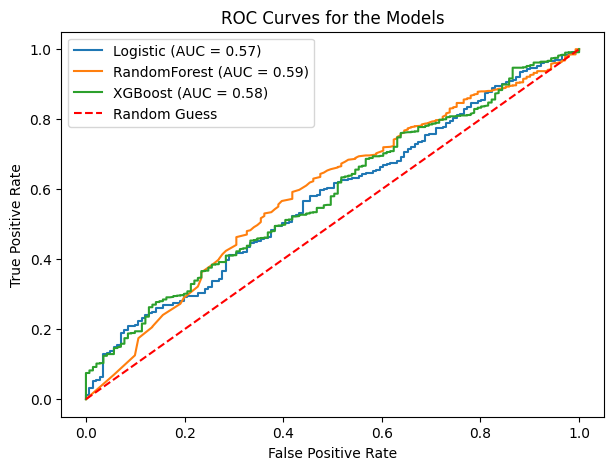

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_xgboost = xgmodel.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 
     'Logistic': y_pred_logistic, 
     'RandomForest': y_pred_rf,
     'XGBoost': y_pred_xgboost,})
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'XGBoost']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

<Axes: >

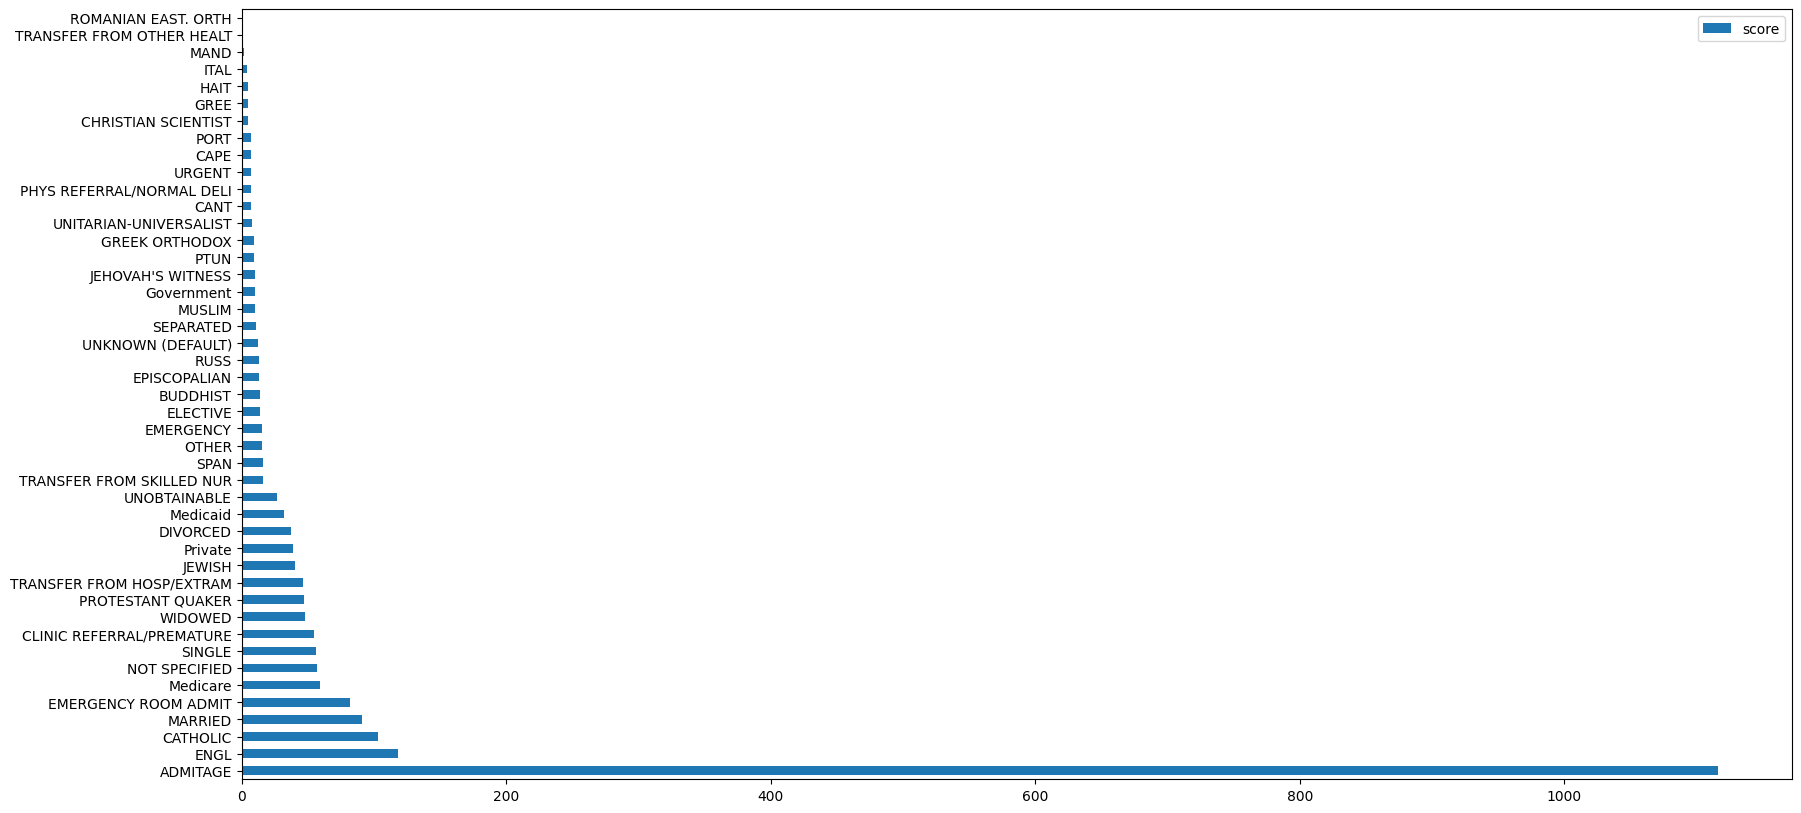

In [34]:
feature_important = xgmodel.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
_nooffeature = 50
data.nlargest(_nooffeature, columns="score").plot(kind='barh', figsize = (20,10))  

<Axes: >

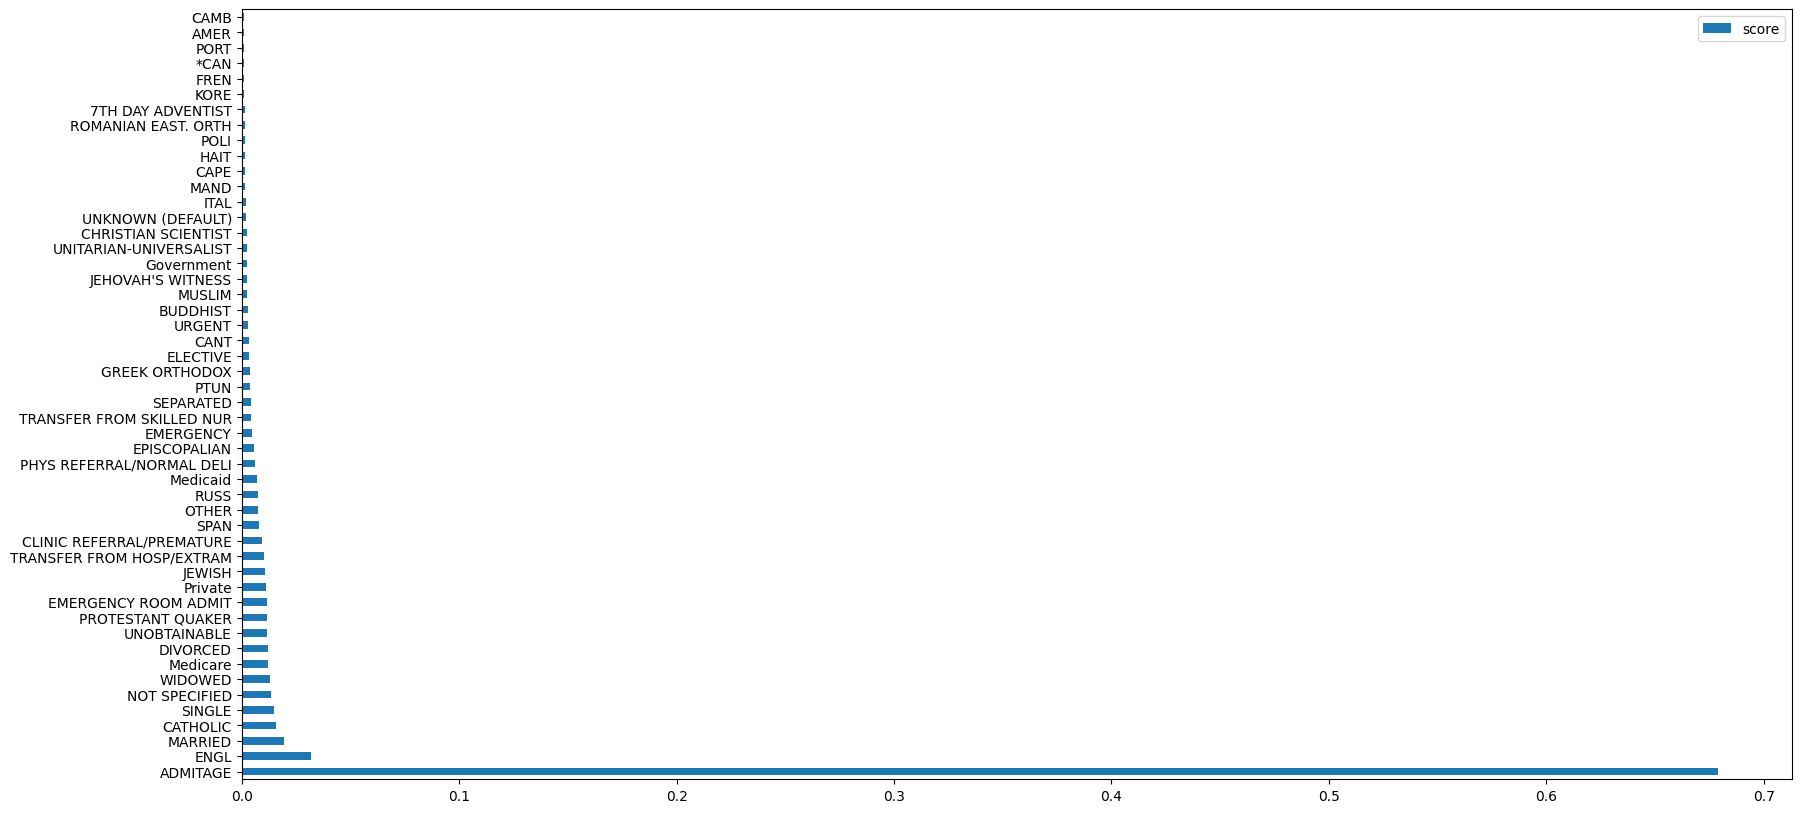

In [35]:
importances = random_forest_model.feature_importances_

keys = list(X_train.columns)
values = list(importances)

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
_nooffeature = 50
data.nlargest(_nooffeature, columns="score").plot(kind='barh', figsize = (20,10))  


Feature Importance (Coefficient and Odds Ratio):
              Feature  Coefficient  Odds Ratio
72  UNKNOWN (DEFAULT)     1.326236    3.766837
41               PORT     1.184926    3.270446
34               GREE     1.014799    2.758810
62              OTHER     0.627537    1.872991
39               PERS     0.593365    1.810069
..                ...          ...         ...
46               THAI    -0.491707    0.611581
49  7TH DAY ADVENTIST    -0.563619    0.569145
26               AMER    -0.581312    0.559164
37               KORE    -0.621593    0.537088
33               FREN    -0.752014    0.471416

[74 rows x 3 columns]


<Axes: >

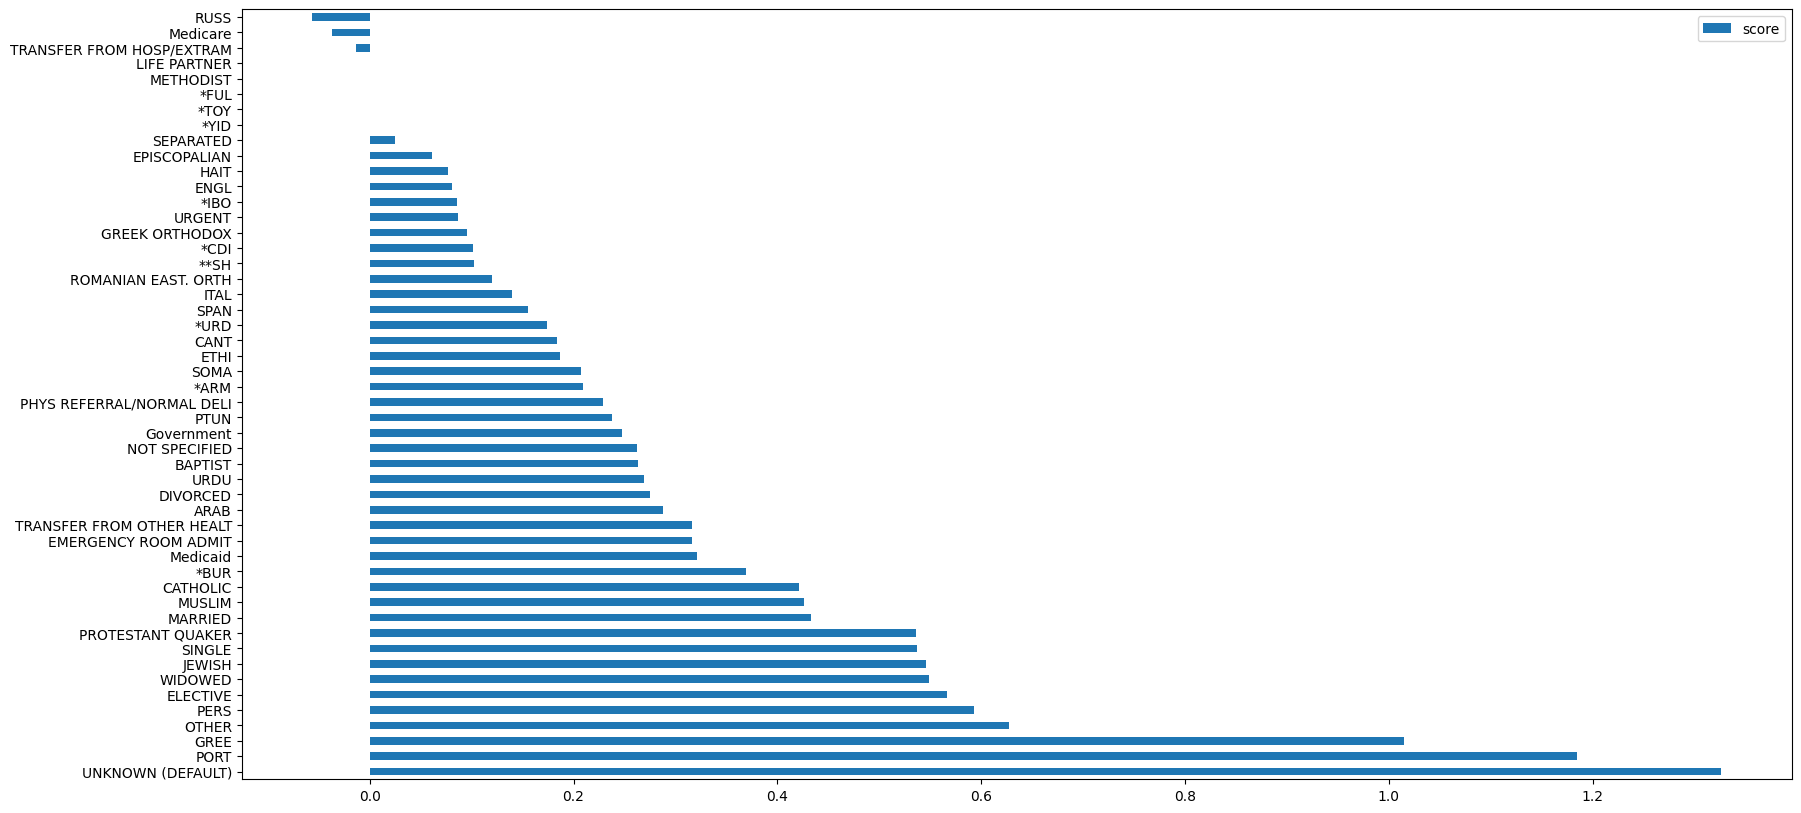

In [36]:
# Coefficients and Odds Ratios
coefficients = logistic_model.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")

print(feature_importance.sort_values(by='Coefficient', ascending=False))
keys = list(feature_importance['Feature'])
values = list(feature_importance['Coefficient'])

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
_nooffeature = 50
data.nlargest(_nooffeature, columns="score").plot(kind='barh', figsize = (20,10))  

Percentage of the survival in 365 days:  0.4672427336999214
X_train:       ADMITAGE  ELECTIVE  EMERGENCY  URGENT  CLINIC REFERRAL/PREMATURE  \
3056 -0.160876     False       True   False                      False   
2100  0.969508     False       True   False                      False   
4409 -1.453710     False       True   False                      False   
2877 -0.302826     False       True   False                       True   
4066 -0.483262     False       True   False                      False   
...        ...       ...        ...     ...                        ...   
4962 -0.142697      True      False   False                      False   
7022 -1.081041     False       True   False                      False   
7075  0.873198     False       True   False                      False   
7330  0.331504     False       True   False                       True   
1134 -1.890779     False       True   False                      False   

      EMERGENCY ROOM ADMIT  PHYS REFERRAL/

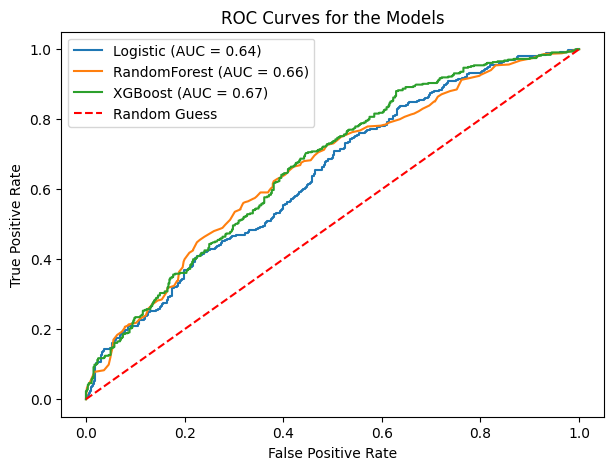

In [37]:
from sklearn.model_selection import train_test_split
X = df
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE365DAYS']
print('Percentage of the survival in 365 days: ', sum(Y)/len(Y))

# Split data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X_train:", X_train)
print("X_val:", X_val)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_val:", y_val)
print("y_test:", y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error', random_state=42)
# Train the model
xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_xgboost = xgmodel.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 
     'Logistic': y_pred_logistic, 
     'RandomForest': y_pred_rf,
     'XGBoost': y_pred_xgboost,})
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'XGBoost']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

In [38]:
def preprocess_text(df):
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df
# df_train = preprocess_text(df_train)
# df_valid = preprocess_text(df_valid)
# df_test = preprocess_text(df_test)

In [39]:
import string
from nltk import word_tokenize
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words

    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

from sklearn.feature_extraction.text import CountVectorizer
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also']
vect = CountVectorizer(max_features = 400,
                       tokenizer = tokenizer_better,
                       stop_words = my_stop_words)
# this could take a while
noteeventsdftexttransformed = vect.fit_transform(noteeventsdf.TEXT.values[:5])

In [40]:
print(noteeventsdftexttransformed.toarray())

[[0 0 0 ... 0 0 0]
 [0 4 0 ... 2 0 1]
 [0 0 1 ... 3 1 0]
 [1 0 1 ... 2 2 2]
 [4 1 1 ... 0 0 0]]


In [41]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

The train score for lr model is 0.079910025527961
The test score for lr model is 0.061745851047217526

Ridge Model............................................

The train score for ridge model is 0.07577051903918419
The test score for ridge model is 0.06752848350221763

Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0005654764312215121


In [42]:
kidneyfailurepatientinfonodeadexpired = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']
kidneyfailurepatientinfonodeadexpired

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,DISCHTODEATH,SURVIVE30DAYS,SURVIVE365DAYS,ADMITAGE
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1305,True,True,62.753425
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1009,True,True,63.408219
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,990,True,True,63.657534
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,647,True,True,64.624658
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,560,True,True,64.794521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,57490,95380,187198,2196-10-10 20:09:00,2196-10-15 15:40:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,...,2145-02-02 00:00:00,2196-11-23 00:00:00,2196-11-23 00:00:00,2196-11-23 00:00:00,1,51,38,True,False,51.720548
8860,57491,95380,198194,2196-10-28 21:19:00,2196-11-09 17:40:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,...,2145-02-02 00:00:00,2196-11-23 00:00:00,2196-11-23 00:00:00,2196-11-23 00:00:00,1,51,13,False,False,51.769863
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2106-03-04 00:00:00,2179-05-04 00:00:00,NaN,2179-05-04 00:00:00,1,73,45,True,False,73.016438
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,2082-03-31 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,1,53,0,False,False,53.953425


In [43]:
kidneyfailurepatientinfonodeadexpired['TEXT'] = ''
for item in kidneyfailurepatientinfonodeadexpired.index:
    textjoint = ' '.join(noteeventsdf[noteeventsdf['HADM_ID'] == kidneyfailurepatientinfonodeadexpired['HADM_ID'][item]]['TEXT'])
    kidneyfailurepatientinfonodeadexpired.loc[item, 'TEXT'] = textjoint


In [44]:
noteeventsdf[noteeventsdf['HADM_ID'] == kidneyfailurepatientinfonodeadexpired['HADM_ID'][item]] 

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
41036,37011,98762,192767.0,2150-06-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2150-6-23**] ...
226148,234849,98762,192767.0,2150-06-28,NaN,NaN,ECG,Report,NaN,NaN,Ectopic atrial rhythm. Left axis deviation. ...
226149,234850,98762,192767.0,2150-06-23,NaN,NaN,ECG,Report,NaN,NaN,Sinus rhythm with borderline sinus tachycardia...
456864,461744,98762,192767.0,2150-06-24,2150-06-24 17:02:00,2150-06-24 17:02:08,Nursing,Nursing Progress Note,15666.0,NaN,The patient is a 53 year old female with no si...
456866,461746,98762,192767.0,2150-06-24,2150-06-24 17:02:00,2150-06-24 17:06:57,Nursing,Nursing Progress Note,15666.0,NaN,The patient is a 53 year old female with no si...
456867,461747,98762,192767.0,2150-06-24,2150-06-24 17:02:00,2150-06-24 17:16:50,Nursing,Nursing Progress Note,15666.0,NaN,The patient is a 53 year old female with no si...
456872,461755,98762,192767.0,2150-06-24,2150-06-24 03:16:00,2150-06-24 17:48:32,Physician,Physician Resident/Attending Admission Note - ...,20066.0,NaN,Chief Complaint: Nausea/vomiting\n HPI:\n ...
456873,461756,98762,192767.0,2150-06-24,2150-06-24 03:16:00,2150-06-24 17:50:50,Physician,Physician Resident/Attending Admission Note - ...,20066.0,NaN,Chief Complaint: Nausea/vomiting\n HPI:\n ...
456970,461817,98762,192767.0,2150-06-25,2150-06-24 23:19:00,2150-06-25 05:09:28,Nursing,Nursing Transfer Note,20672.0,NaN,The patient is a 53 year old female with no si...
457485,461612,98762,192767.0,2150-06-24,2150-06-24 06:25:00,2150-06-24 06:25:21,Nursing,Nursing Progress Note,20482.0,NaN,The patient is a 53 year old female with no si...


In [45]:
noteeventsdfkidneyfailure = noteeventsdf[noteeventsdf['HADM_ID'].isin( kidneyfailurepatientinfonodeadexpired['HADM_ID'] )] 
noteeventsdfkidneyfailure

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
17,228,79900,120644.0,2194-07-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2194-7-18**] ...
18,229,79900,128319.0,2195-04-17,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2195-4-14**] ...
...,...,...,...,...,...,...,...,...,...,...,...
2066656,698870,97716,178708.0,2163-11-09,2163-11-09 07:14:00,2163-11-09 10:59:41,Physician,Physician Resident Progress Note,14794.0,NaN,Chief Complaint:\n 24 Hour Events:\n INVASIV...
2066664,697999,64798,160505.0,2172-08-21,2172-08-21 07:15:00,2172-08-21 07:36:39,Physician,Physician Resident Progress Note,14393.0,NaN,Chief Complaint:\n 24 Hour Events:\n -wean...
2066673,697193,74674,194853.0,2176-10-06,2176-10-06 06:08:00,2176-10-06 09:03:15,Physician,Physician Resident Progress Note,18816.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...
2066674,697197,74674,194853.0,2176-10-06,2176-10-06 06:08:00,2176-10-06 09:17:05,Physician,Physician Resident Progress Note,21491.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...


In [46]:
def tokenizer_better_length(x):
    return len(tokenizer_better(x))
noteeventsdfkidneyfailure['TOKENLEN'] = noteeventsdfkidneyfailure['TEXT'].apply(tokenizer_better_length)

In [47]:
noteeventsdfkidneyfailure

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,TOKENLEN
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...,1845
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...,1316
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...,2384
17,228,79900,120644.0,2194-07-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2194-7-18**] ...,2429
18,229,79900,128319.0,2195-04-17,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2195-4-14**] ...,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
2066656,698870,97716,178708.0,2163-11-09,2163-11-09 07:14:00,2163-11-09 10:59:41,Physician,Physician Resident Progress Note,14794.0,NaN,Chief Complaint:\n 24 Hour Events:\n INVASIV...,444
2066664,697999,64798,160505.0,2172-08-21,2172-08-21 07:15:00,2172-08-21 07:36:39,Physician,Physician Resident Progress Note,14393.0,NaN,Chief Complaint:\n 24 Hour Events:\n -wean...,903
2066673,697193,74674,194853.0,2176-10-06,2176-10-06 06:08:00,2176-10-06 09:03:15,Physician,Physician Resident Progress Note,18816.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...,747
2066674,697197,74674,194853.0,2176-10-06,2176-10-06 06:08:00,2176-10-06 09:17:05,Physician,Physician Resident Progress Note,21491.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...,905


In [48]:
noteeventsdfkidneyfailure.groupby('CATEGORY')['TOKENLEN'].mean()

CATEGORY
Case Management       144.008368
Consult               880.500000
Discharge summary    1623.077069
ECG                    30.287945
Echo                  320.111981
General               204.143241
Nursing               264.205731
Nursing/other         153.239299
Nutrition             268.735229
Pharmacy              229.481481
Physician             751.901704
Radiology             185.627330
Rehab Services        403.750620
Respiratory           145.720804
Social Work           306.476608
Name: TOKENLEN, dtype: float64

In [49]:
notecategory = noteeventsdfkidneyfailure['CATEGORY'].value_counts().to_frame()
notecategory['percentage'] = notecategory['count'] / noteeventsdfkidneyfailure.shape[0]
notecategory['average token lenght'] = noteeventsdfkidneyfailure.groupby('CATEGORY')['TOKENLEN'].mean()
notecategory

,count,percentage,average token lenght
CATEGORY,,,
Nursing/other,80644,0.324526,153.239299
Radiology,55368,0.222811,185.627330
Nursing,39717,0.159828,264.205731
Physician,26705,0.107466,751.901704
ECG,23053,0.092769,30.287945
Discharge summary,7396,0.029763,1623.077069
Respiratory,5917,0.023811,145.720804
Echo,4983,0.020052,320.111981
Nutrition,1794,0.007219,268.735229


In [50]:
kidneyfailurepatientinfonodeadexpired

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE,DISCHTODEATH,SURVIVE30DAYS,SURVIVE365DAYS,ADMITAGE,TEXT
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1305,True,True,62.753425,Admission Date: [**2197-12-6**] ...
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,1009,True,True,63.408219,Admission Date: [**2198-8-2**] D...
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,990,True,True,63.657534,Admission Date: [**2198-11-1**] ...
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,647,True,True,64.624658,Admission Date: [**2199-10-20**] ...
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66,560,True,True,64.794521,Admission Date: [**2199-12-21**] ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,57490,95380,187198,2196-10-10 20:09:00,2196-10-15 15:40:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,...,2196-11-23 00:00:00,2196-11-23 00:00:00,2196-11-23 00:00:00,1,51,38,True,False,51.720548,Admission Date: [**2196-10-10**] ...
8860,57491,95380,198194,2196-10-28 21:19:00,2196-11-09 17:40:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,...,2196-11-23 00:00:00,2196-11-23 00:00:00,2196-11-23 00:00:00,1,51,13,False,False,51.769863,Admission Date: [**2196-10-28**] ...
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,2179-05-04 00:00:00,NaN,2179-05-04 00:00:00,1,73,45,True,False,73.016438,Admission Date: [**2179-2-20**] ...
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,2136-03-11 00:00:00,2136-03-11 00:00:00,2136-03-11 00:00:00,1,53,0,False,False,53.953425,Admission Date: [**2136-3-1**] D...


In [51]:
# kidneyfailurepatientinfonodeadexpired['TEXT'] = ''
# for item in kidneyfailurepatientinfonodeadexpired.index:
#     kidneyfailurepatientinfonodeadexpired['HADM_ID'][item]
for i in range(len(notecategory.index)):
    kidneyfailurepatientinfonodeadexpired['CAT_'+str(i)] = ' '

for item in kidneyfailurepatientinfonodeadexpired.index:
# item  = kidneyfailurepatientinfonodeadexpired.index[0]
    tempdf = noteeventsdf[noteeventsdf['HADM_ID'] == kidneyfailurepatientinfonodeadexpired['HADM_ID'][item]] 
    
    for i in range(len(notecategory.index)): 
        textjoint = ' '.join( tempdf[tempdf['CATEGORY'] == notecategory.index[i]] ['TEXT'])
        kidneyfailurepatientinfonodeadexpired.loc[item, 'CAT_'+str(i)] = textjoint


# for item in (notecategory.index):
#     # pass
#     # print(item)
#     tempdf[tempdf['CATEGORY'] == item][item] = ' '.join()

In [52]:
kidneyfailurepatientinfonodeadexpired

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,CAT_5,CAT_6,CAT_7,CAT_8,CAT_9,CAT_10,CAT_11,CAT_12,CAT_13,CAT_14
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2197-12-6**] ...,,,,,,,,,
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2198-8-2**] D...,,PATIENT/TEST INFORMATION:\nIndication: assess ...,,,,,,,
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2198-11-1**] ...,,,,,,,,,
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,Admission Date: [**2199-10-20**] ...,,,,,,,,,
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,Admission Date: [**2199-12-21**] ...,Demographics\n Day of intubation: [**2199-12...,,"Pertinent medications: RISS, Lantus, Lactulose...",Clinician: Attending\n Critical Care\n Re...,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,57490,95380,187198,2196-10-10 20:09:00,2196-10-15 15:40:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,...,Admission Date: [**2196-10-10**] ...,,,,,,,,,
8860,57491,95380,198194,2196-10-28 21:19:00,2196-11-09 17:40:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,...,Admission Date: [**2196-10-28**] ...,,,,,,,,,
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,Admission Date: [**2179-2-20**] ...,,PATIENT/TEST INFORMATION:\nIndication: 721 yoM...,,Cardiology Teaching Physician Note\n On this...,,,,,
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,Admission Date: [**2136-3-1**] D...,,,,,,,,,


In [53]:
tempdf = noteeventsdf[noteeventsdf['HADM_ID'] == kidneyfailurepatientinfonodeadexpired['HADM_ID'][item]] 
tempdf = tempdf[tempdf['CATEGORY'] == notecategory.index[1]] 
tempdf

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
1065640,1080757,98762,192767.0,2150-06-25,2150-06-25 11:25:00,NaN,Radiology,CHEST (PA & LAT),NaN,NaN,[**2150-6-25**] 11:25 AM\n CHEST (PA & LAT) ...
1065909,1080500,98762,192767.0,2150-06-24,2150-06-24 02:48:00,NaN,Radiology,RENAL U.S.,NaN,NaN,[**2150-6-24**] 2:48 AM\n RENAL U.S. ...
1065910,1080501,98762,192767.0,2150-06-24,2150-06-24 02:48:00,NaN,Radiology,RENAL U.S.,NaN,NaN,"[**Last Name (LF) **],[**First Name8 (NamePatt..."
1065971,1080558,98762,192767.0,2150-06-24,2150-06-24 10:29:00,NaN,Radiology,INTRO CATH RENAL PELVIS FOR DRAINAGE,NaN,NaN,[**2150-6-24**] 10:29 AM\n PERC NEPHROSTO ...
1066155,1080559,98762,192767.0,2150-06-24,2150-06-24 10:29:00,NaN,Radiology,INTRO CATH RENAL PELVIS FOR DRAINAGE,NaN,NaN,"[**Last Name (LF) **],[**First Name8 (NamePatt..."
1066650,1080460,98762,192767.0,2150-06-23,2150-06-23 19:27:00,NaN,Radiology,CT ABDOMEN W/O CONTRAST,NaN,NaN,[**2150-6-23**] 7:27 PM\n CT ABDOMEN W/O CONTR...


In [54]:
kidneyfailurepatientinfonodeadexpired['HADM_ID'][item]

np.int64(192767)

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
kidneyfailurepatientinfonodeadexpired

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,CAT_5,CAT_6,CAT_7,CAT_8,CAT_9,CAT_10,CAT_11,CAT_12,CAT_13,CAT_14
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2197-12-6**] ...,,,,,,,,,
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2198-8-2**] D...,,PATIENT/TEST INFORMATION:\nIndication: assess ...,,,,,,,
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2198-11-1**] ...,,,,,,,,,
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,Admission Date: [**2199-10-20**] ...,,,,,,,,,
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,Admission Date: [**2199-12-21**] ...,Demographics\n Day of intubation: [**2199-12...,,"Pertinent medications: RISS, Lantus, Lactulose...",Clinician: Attending\n Critical Care\n Re...,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,57490,95380,187198,2196-10-10 20:09:00,2196-10-15 15:40:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,...,Admission Date: [**2196-10-10**] ...,,,,,,,,,
8860,57491,95380,198194,2196-10-28 21:19:00,2196-11-09 17:40:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,...,Admission Date: [**2196-10-28**] ...,,,,,,,,,
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,Admission Date: [**2179-2-20**] ...,,PATIENT/TEST INFORMATION:\nIndication: 721 yoM...,,Cardiology Teaching Physician Note\n On this...,,,,,
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,Admission Date: [**2136-3-1**] D...,,,,,,,,,


In [58]:
kidneyfailurepatientinfonodeadexpired

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,CAT_5,CAT_6,CAT_7,CAT_8,CAT_9,CAT_10,CAT_11,CAT_12,CAT_13,CAT_14
0,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2197-12-6**] ...,,,,,,,,,
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2198-8-2**] D...,,PATIENT/TEST INFORMATION:\nIndication: assess ...,,,,,,,
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,Admission Date: [**2198-11-1**] ...,,,,,,,,,
3,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,Admission Date: [**2199-10-20**] ...,,,,,,,,,
4,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,Admission Date: [**2199-12-21**] ...,Demographics\n Day of intubation: [**2199-12...,,"Pertinent medications: RISS, Lantus, Lactulose...",Clinician: Attending\n Critical Care\n Re...,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,57490,95380,187198,2196-10-10 20:09:00,2196-10-15 15:40:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,...,Admission Date: [**2196-10-10**] ...,,,,,,,,,
8860,57491,95380,198194,2196-10-28 21:19:00,2196-11-09 17:40:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Private,...,Admission Date: [**2196-10-28**] ...,,,,,,,,,
8863,58540,98642,162213,2179-02-20 14:21:00,2179-03-19 18:51:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,...,Admission Date: [**2179-2-20**] ...,,PATIENT/TEST INFORMATION:\nIndication: 721 yoM...,,Cardiology Teaching Physician Note\n On this...,,,,,
8864,58558,98701,124568,2136-03-01 21:30:00,2136-03-10 14:03:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOSPICE-HOME,Private,...,Admission Date: [**2136-3-1**] D...,,,,,,,,,


In [59]:
noteeventsdftexttransformed = vect.fit_transform(kidneyfailurepatientinfonodeadexpired.TEXT.values)
noteeventsdftexttransformed.toarray()

array([[35, 24,  6, ..., 48, 36,  5],
       [54, 44, 19, ..., 55, 73,  5],
       [17,  6,  2, ..., 16, 20,  3],
       ...,
       [ 6,  7,  2, ..., 17, 15, 13],
       [ 7, 13,  5, ...,  9,  0,  0],
       [ 2,  7, 28, ..., 26,  3,  0]], shape=(6365, 400))

In [60]:
kidneyfailurepatientinfonodeadexpired.columns

Index(['ROW_ID_x', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_y', 'GENDER',
       'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG', 'AGE',
       'DISCHTODEATH', 'SURVIVE30DAYS', 'SURVIVE365DAYS', 'ADMITAGE', 'TEXT',
       'CAT_0', 'CAT_1', 'CAT_2', 'CAT_3', 'CAT_4', 'CAT_5', 'CAT_6', 'CAT_7',
       'CAT_8', 'CAT_9', 'CAT_10', 'CAT_11', 'CAT_12', 'CAT_13', 'CAT_14'],
      dtype='object')

In [61]:
import torch
t0array = vect.fit_transform(kidneyfailurepatientinfonodeadexpired.CAT_0.values)
t0 = torch.tensor(t0array.toarray())
t0 = t0[:,:,None]
print(t0.shape)
# t1 = torch.tensor(noteeventsdftexttransformed.toarray())
# torch.stack((t0, t1), dim= 2).shape
for i in range(1, 15):
    t1array = vect.fit_transform(kidneyfailurepatientinfonodeadexpired['CAT_'+str(i)].values)
    t1 = torch.tensor(t1array.toarray())
    t1 = t1[:,:,None]
    t0 = torch.concatenate((t0, t1), dim=2)
    print(t0.shape)
    


torch.Size([6365, 400, 1])
torch.Size([6365, 400, 2])
torch.Size([6365, 400, 3])
torch.Size([6365, 400, 4])
torch.Size([6365, 400, 5])
torch.Size([6365, 400, 6])
torch.Size([6365, 400, 7])
torch.Size([6365, 400, 8])
torch.Size([6365, 400, 9])
torch.Size([6365, 400, 10])
torch.Size([6365, 400, 11])
torch.Size([6365, 400, 12])
torch.Size([6365, 400, 13])
torch.Size([6365, 400, 14])
torch.Size([6365, 400, 15])


In [405]:
import torch
import torch.nn as nn
import torch.optim.adam
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.backends.cudnn.enable =True; torch.backends.cudnn.benchmark = True
class DeepNNNotes(nn.Module): 
    def __init__(self, n_noofnotes:int=15, n_in: int = 1, n_h: int = 1, n_output: int = 1 ):
        super().__init__() 
        self.layer0 = nn.Linear(in_features=n_noofnotes, out_features=1)
        self.layer1 = nn.Linear(in_features=n_in, out_features=n_h)
        self.layer2 = nn.Linear(n_h, n_h)
        self.layer3 = nn.Linear(n_h, n_h)
        self.layer4 = nn.Linear(3*n_h, n_output)
        self.relu = nn.ReLU()
        # self.channelmean = channelmeans
        # self.channelstd = channelstd

    
    def forward(self, x):
        # for i in range(15):
        #     print(self.channelmean[i], self.channelstd[i])
        #     x[:, :, i] = (x[:, :, i]  - self.channelmean[i]) / self.channelstd[i]

        x = self.layer0(x)
        # print(x.shape)
        x = self.relu(x)
        x = x[:,:,0]
        # print(x.shape)
        x0 = self.relu(self.layer1(x))
        x1 = self.relu(self.layer2(x0))
        x2 = self.relu(self.layer3(x1))
        xfinalinput = torch.concatenate((x0,x1,x2), dim=1)
        # print(xfinalinput.shape)
        xfinaloutput = nn.Sigmoid()(self.layer4(xfinalinput))
        return xfinaloutput

dnn1 = DeepNNNotes(15, 400, 300, 1).to(device)
dnn1.forward((t0).to(device).float())

tensor([[0.5135],
        [0.5071],
        [0.4963],
        ...,
        [0.4976],
        [0.4970],
        [0.5016]], device='cuda:0', grad_fn=<SigmoidBackward0>)

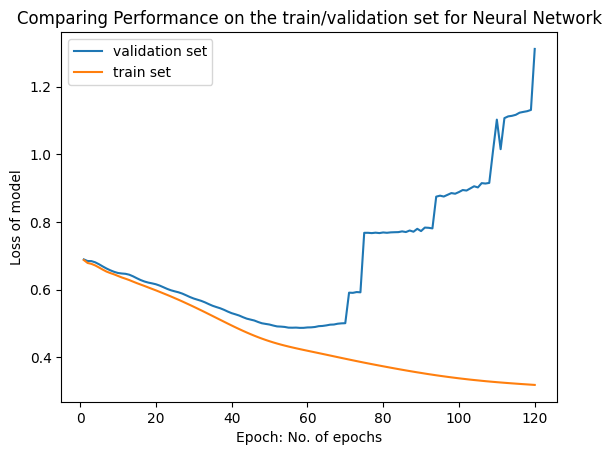

In [406]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE30DAYS']
randomstateno = 50
t0_train , t0_temp, t0Y_train, t0Y_temp = train_test_split(t0, Y, test_size=0.3, random_state=randomstateno)
t0_val , t0_test, t0Y_val, t0Y_test = train_test_split(t0_temp, t0Y_temp, test_size=0.5, random_state=randomstateno)

t0_channelmean = torch.mean((t0_train+0.0),(0,1))
t0_channelstd = torch.std((t0_train+0.0),(0,1))


class NeuralNetworkNotes(nn.Module):
    def __init__(self, n_h = 300, noofepochs = 250):
        super().__init__()
        self.model = None
        self.n_h = n_h
        self.noofepochs = noofepochs

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        x = X_train.to(device).float()
        y = torch.from_numpy(np.vstack(y_train.values + 0.0).astype(np.float32) ).to(device).float()
        
        if X_val is not None:
            x_val = X_val.to(device).float()
            y_val = torch.from_numpy(np.vstack(y_val.values + 0.0).astype(np.float32) ).to(device).float()

        n_in, n_h, n_out, n_noofnotes = x.shape[1], self.n_h, 1, x.shape[-1]
        model2 = DeepNNNotes(n_noofnotes=n_noofnotes, n_in=n_in, n_h=n_h,n_output=n_out) 
                            #  channelmeans=t0_channelmean, channelstd=t0_channelstd)
        model2 = model2.to(device) 
        criterion = torch.nn.BCELoss()
        optimizer = torch.optim.Adam(model2.parameters(), lr=0.0005)  

        parameterlist = list(range(1, self.noofepochs+1))
        losstraining = []
        lossvalidation = []
        for epoch in range(self.noofepochs):  
            y_pred = model2(x)   
            loss = criterion(y_pred, y)  # 
            losstraining.append(loss.item())
            
            if X_val is not None:
                lossval = criterion(model2(x_val), y_val)
                lossvalidation.append(lossval.item())
                lossval = None
            # print('epoch: ', epoch, 'loss: ', loss.item())   
            optimizer.zero_grad()  
            loss.backward()   
            optimizer.step()   
        if X_val is not None:
            plt.plot(parameterlist, lossvalidation, label = 'validation set' )
        plt.plot(parameterlist, losstraining, label = 'train set')
        plt.xlabel('Epoch: No. of epochs')
        plt.ylabel('Loss of model')
        plt.title('Comparing Performance on the train/validation set for Neural Network')
        plt.legend()
        self.model = model2

    def predict_prob(self, X_test):
        x = X_test.to(device).float()
        result = self.model.forward(x)
        return result.cpu().detach().numpy()
    
nmodel = NeuralNetworkNotes(n_h=70, noofepochs=120)
nmodel.fit(t0_train, t0Y_train, t0_val, t0Y_val)

In [396]:
def computevalloss(nmodel, t0_val, t0Y_val):
    x_val = t0_val.to(device).float()
    y_val = torch.from_numpy(np.vstack(t0Y_val.values + 0.0).astype(np.float32) ).to(device).float()
    return torch.nn.BCELoss()(nmodel.model.forward(x_val), y_val).item()

computevalloss(nmodel, t0_val, t0Y_val)

0.601161777973175

model i : 0 	 loss:	 1.0088926553726196
model i : 1 	 loss:	 0.4122409224510193
model i : 2 	 loss:	 0.7074337601661682
model i : 3 	 loss:	 0.4694119989871979
model i : 4 	 loss:	 0.6534175276756287
model i : 5 	 loss:	 0.4726164937019348
model i : 6 	 loss:	 0.8108533024787903
model i : 7 	 loss:	 0.39421117305755615
model i : 8 	 loss:	 0.42104268074035645
model i : 9 	 loss:	 0.47729453444480896
model i : 10 	 loss:	 0.4081061780452728
model i : 11 	 loss:	 0.6702572703361511
model i : 12 	 loss:	 0.37176603078842163
model i : 13 	 loss:	 0.4060627520084381
model i : 14 	 loss:	 0.9412515759468079
model i : 15 	 loss:	 1.4496798515319824
model i : 16 	 loss:	 0.39910295605659485
model i : 17 	 loss:	 0.5485330820083618
model i : 18 	 loss:	 0.5932568907737732
model i : 19 	 loss:	 0.7156919836997986


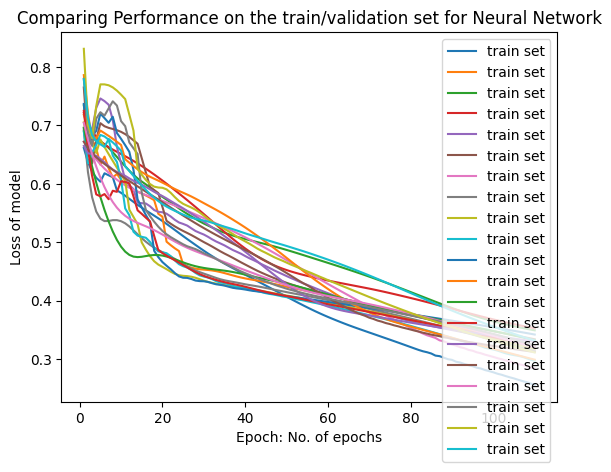

In [411]:
nmodel = None
currentbestloss = 100
for i in range(20):
    thisnmodel = NeuralNetworkNotes(n_h=70, noofepochs=110)
    thisnmodel.fit(t0_train, t0Y_train)
    thisloss = computevalloss(thisnmodel, t0_val, t0Y_val)
    print('model i : ' + str(i), '\t loss:\t', thisloss)
    if thisloss < currentbestloss:
        currentbestloss =  thisloss
        nmodel = thisnmodel


In [252]:
# torch.mean((t0_train+0.0),(0,1))
# torch.std((t0_train+0.0),(0,1))

In [150]:
t0Y_predict = nmodel.predict_prob(t0_test)
sum(t0Y_predict)

array([806.61414], dtype=float32)

In [151]:
sum(t0Y_test)

814

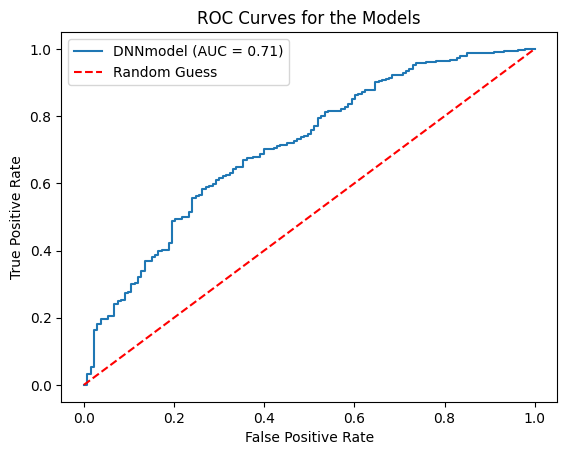

In [412]:
t0Y_predict = nmodel.predict_prob(t0_test)
fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

In [68]:
notecategory

,count,percentage,average token lenght
CATEGORY,,,
Nursing/other,80644,0.324526,153.239299
Radiology,55368,0.222811,185.627330
Nursing,39717,0.159828,264.205731
Physician,26705,0.107466,751.901704
ECG,23053,0.092769,30.287945
Discharge summary,7396,0.029763,1623.077069
Respiratory,5917,0.023811,145.720804
Echo,4983,0.020052,320.111981
Nutrition,1794,0.007219,268.735229


In [69]:
print(nmodel.model.layer0.weight)

Parameter containing:
tensor([[-0.0995, -0.0749,  0.0048,  0.1850, -0.0776,  0.2103,  0.1868, -0.2387,
         -0.0924,  0.0015, -0.0420,  0.0929,  0.0054,  0.0818,  0.2157]],
       device='cuda:0', requires_grad=True)


In [ ]:
noteeventsdftexttransformedfitransformvector  = noteeventsdftexttransformed.toarray()
noteeventsdftexttransformedfitransformvector.shape
# vect.get_feature_names_out()

array(['abdominal', 'abnormal', 'abnormalities', 'above', 'acetaminophen',
       'acute', 'admission', 'admitted', 'af', 'after', 'ago',
       'albuterol', 'alcohol', 'allergies', 'alone', 'although',
       'amiodarone', 'another', 'antibiotics', 'any', 'aortic', 'appears',
       'appropriate', 'artery', 'asa', 'assessment', 'associated',
       'asthma', 'atrial', 'atrium', 'avnrt', 'back', 'balance',
       'baseline', 'been', 'beta', 'bid', 'bilaterally', 'blood', 'bp',
       'bpm', 'breath', 'broke', 'bruits', 'c', 'ca', 'cabg', 'cad',
       'can', 'cancer', 'captopril', 'cardiac', 'cardiology', 'carotid',
       'catheterization', 'cavity', 'changes', 'chest', 'chf', 'chief',
       'children', 'chronic', 'ck', 'ckmb', 'clopidogrel', 'cm',
       'comments', 'complaint', 'complicated', 'comprehensive',
       'consider', 'consistent', 'constipation', 'consult',
       'consultation', 'continue', 'copd', 'coronary', 'cough', 'cp',
       'cr', 'current', 'currently', 'cvp', '

In [70]:
textdataframe = pd.DataFrame(noteeventsdftexttransformed.toarray())
textdataframe.columns = vect.get_feature_names_out()
textdataframe

,abdominal,abnormal,abnormalities,above,acetaminophen,acute,admission,admitted,af,after,...,weeks,well,wenckebach,wheezing,when,who,will,without,would,years
0,35,24,6,40,9,10,0,12,9,5,...,32,2,25,14,12,0,44,48,36,5
1,54,44,19,52,12,19,2,13,5,4,...,21,1,44,43,38,0,84,55,73,5
2,17,6,2,0,14,8,0,2,18,5,...,10,0,12,17,3,0,20,16,20,3
3,0,1,4,2,7,4,28,4,31,1,...,8,10,11,0,2,0,9,42,0,0
4,11,32,41,59,20,53,203,81,131,40,...,33,7,166,8,111,0,58,47,20,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,0,3,2,0,0,1,0,5,10,3,...,3,1,0,0,2,0,1,7,0,0
6361,3,2,4,0,0,2,0,6,8,8,...,6,1,2,7,2,0,2,11,0,0
6362,6,7,2,8,17,8,122,63,15,1,...,24,3,58,1,3,0,29,17,15,13
6363,7,13,5,0,2,0,0,11,4,3,...,2,4,0,17,8,8,14,9,0,0


In [71]:
df.reset_index(drop=True, inplace=True)

In [72]:
textdataframe

,abdominal,abnormal,abnormalities,above,acetaminophen,acute,admission,admitted,af,after,...,weeks,well,wenckebach,wheezing,when,who,will,without,would,years
0,35,24,6,40,9,10,0,12,9,5,...,32,2,25,14,12,0,44,48,36,5
1,54,44,19,52,12,19,2,13,5,4,...,21,1,44,43,38,0,84,55,73,5
2,17,6,2,0,14,8,0,2,18,5,...,10,0,12,17,3,0,20,16,20,3
3,0,1,4,2,7,4,28,4,31,1,...,8,10,11,0,2,0,9,42,0,0
4,11,32,41,59,20,53,203,81,131,40,...,33,7,166,8,111,0,58,47,20,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,0,3,2,0,0,1,0,5,10,3,...,3,1,0,0,2,0,1,7,0,0
6361,3,2,4,0,0,2,0,6,8,8,...,6,1,2,7,2,0,2,11,0,0
6362,6,7,2,8,17,8,122,63,15,1,...,24,3,58,1,3,0,29,17,15,13
6363,7,13,5,0,2,0,0,11,4,3,...,2,4,0,17,8,8,14,9,0,0


In [73]:
dfwithtext = pd.concat([df, textdataframe], axis=1)
dfwithtext

,ADMITAGE,ELECTIVE,EMERGENCY,URGENT,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,TRANSFER FROM OTHER HEALT,TRANSFER FROM SKILLED NUR,...,weeks,well,wenckebach,wheezing,when,who,will,without,would,years
0,-0.359684,False,True,False,False,True,False,False,False,False,...,32,2,25,14,12,0,44,48,36,5
1,-0.313463,False,True,False,False,True,False,False,False,False,...,21,1,44,43,38,0,84,55,73,5
2,-0.295864,False,True,False,False,True,False,False,False,False,...,10,0,12,17,3,0,20,16,20,3
3,-0.227596,False,True,False,False,True,False,False,False,False,...,8,10,11,0,2,0,9,42,0,0
4,-0.215606,False,True,False,False,True,False,False,False,False,...,33,7,166,8,111,0,58,47,20,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,-1.138479,False,True,False,True,False,False,False,False,False,...,3,1,0,0,2,0,1,7,0,0
6361,-1.134998,False,True,False,False,False,False,True,False,False,...,6,1,2,7,2,0,2,11,0,0
6362,0.364767,False,True,False,False,True,False,False,False,False,...,24,3,58,1,3,0,29,17,15,13
6363,-0.980863,False,True,False,True,False,False,False,False,False,...,2,4,0,17,8,8,14,9,0,0


In [305]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE30DAYS']
print('Percentage of the survival in 30 days: ', sum(Y)/len(Y))
Y.reset_index(drop=True, inplace=True)

from sklearn.model_selection import train_test_split
# X = dfwithtext
X = textdataframe
# Y = kidneyfailurepatientinfo['SURVIVE30DAYS']
# Split data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=randomstateno)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=randomstateno)

print("X_train:", X_train)
print("X_val:", X_val)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_val:", y_val)
print("y_test:", y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Percentage of the survival in 30 days:  0.8560879811468971
X_train:       abdominal  abnormal  abnormalities  above  acetaminophen  acute  \
2889         62        19              6     62             33     28   
3835         10        16             15      0              1      1   
4856          6         4              1      0              0      0   
2488        125        57             63     53             31     16   
3387          2         1              1      1              2      2   
...         ...       ...            ...    ...            ...    ...   
2014          3         1              0      5              1      1   
6253          1         7              2      0              0      0   
1931          1         0              1      0              0      0   
5600          8         4              8     17             10      5   
5808         54        12             22      9              7      5   

      admission  admitted  af  after  ...  weeks  well 

In [306]:
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=700, random_state=42)
# Train the model
xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

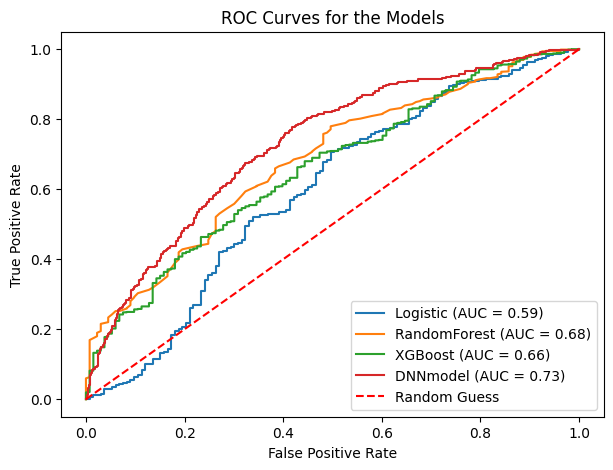

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_xgboost = xgmodel.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 
     'Logistic': y_pred_logistic, 
     'RandomForest': y_pred_rf,
     'XGBoost': y_pred_xgboost,
     })
plt.figure(figsize=(7, 5))
for model in ['Logistic', 'RandomForest', 'XGBoost' ]:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

In [ ]:
t0Y_predict[:,0].shape

(955,)

<Axes: >

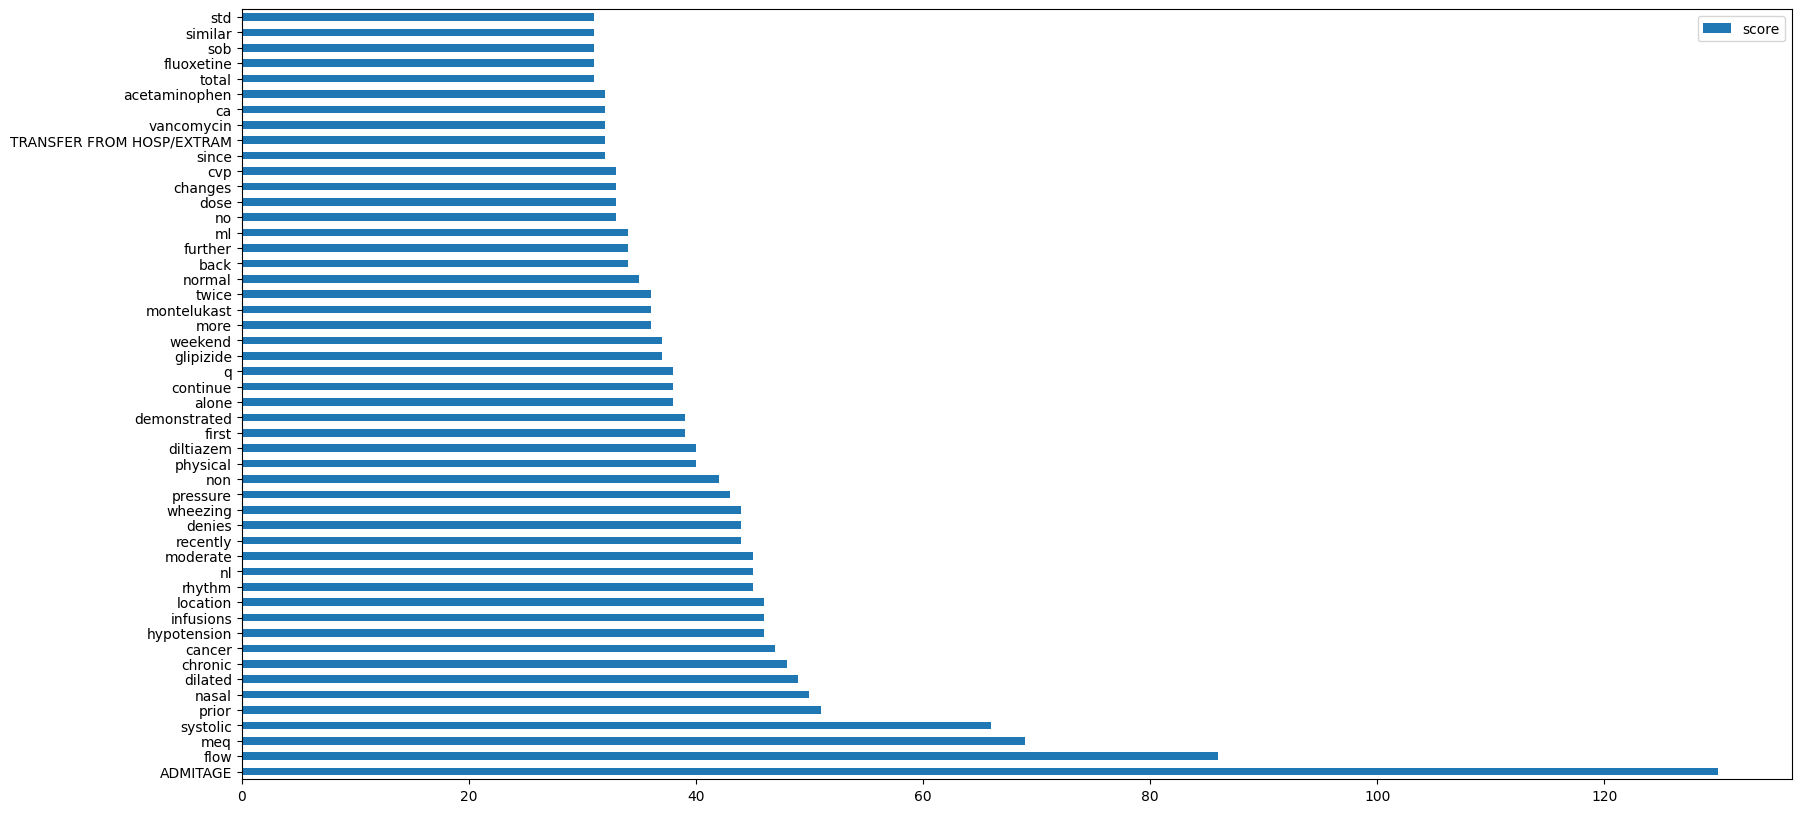

In [ ]:
feature_important = xgmodel.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
_nooffeature = 50
data.nlargest(_nooffeature, columns="score").plot(kind='barh', figsize = (20,10))  

<Axes: >

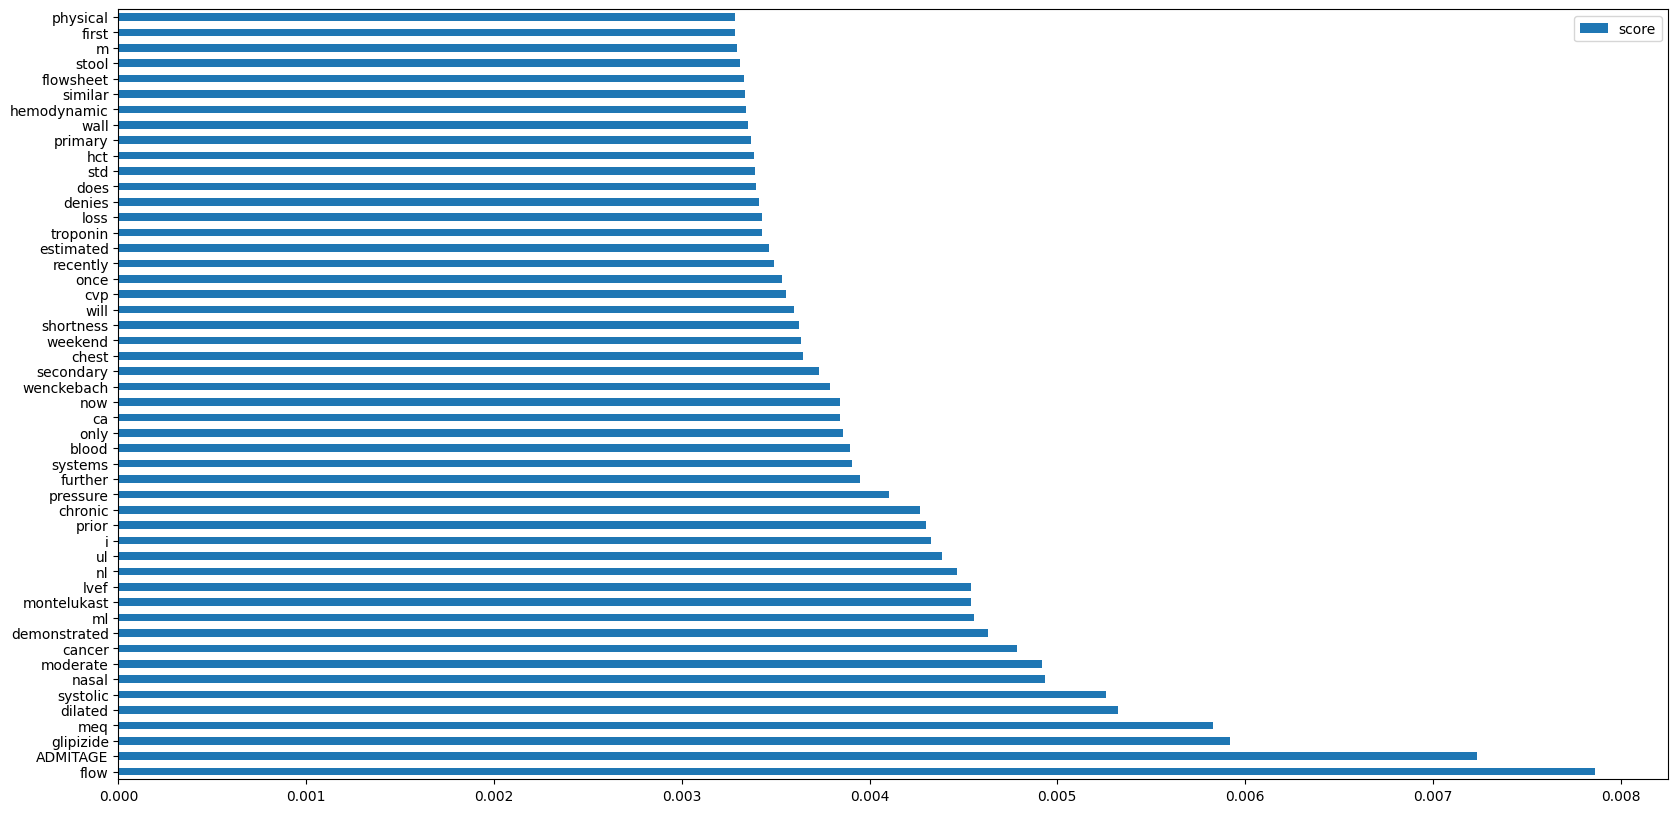

In [ ]:
importances = random_forest_model.feature_importances_

keys = list(X_train.columns)
values = list(importances)

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
_nooffeature = 50
data.nlargest(_nooffeature, columns="score").plot(kind='barh', figsize = (20,10))  


Feature Importance (Coefficient and Odds Ratio):
        Feature  Coefficient  Odds Ratio
326        past     0.081312    1.084709
223          hg     0.078017    1.081141
173        does     0.073321    1.076075
301    negative     0.059187    1.060973
442       twice     0.055319    1.056878
..          ...          ...         ...
344  prevention    -0.048934    0.952244
144    consider    -0.049380    0.951819
348   procedure    -0.056681    0.944895
116       broke    -0.057463    0.944157
306          nl    -0.061084    0.940744

[474 rows x 3 columns]


<Axes: >

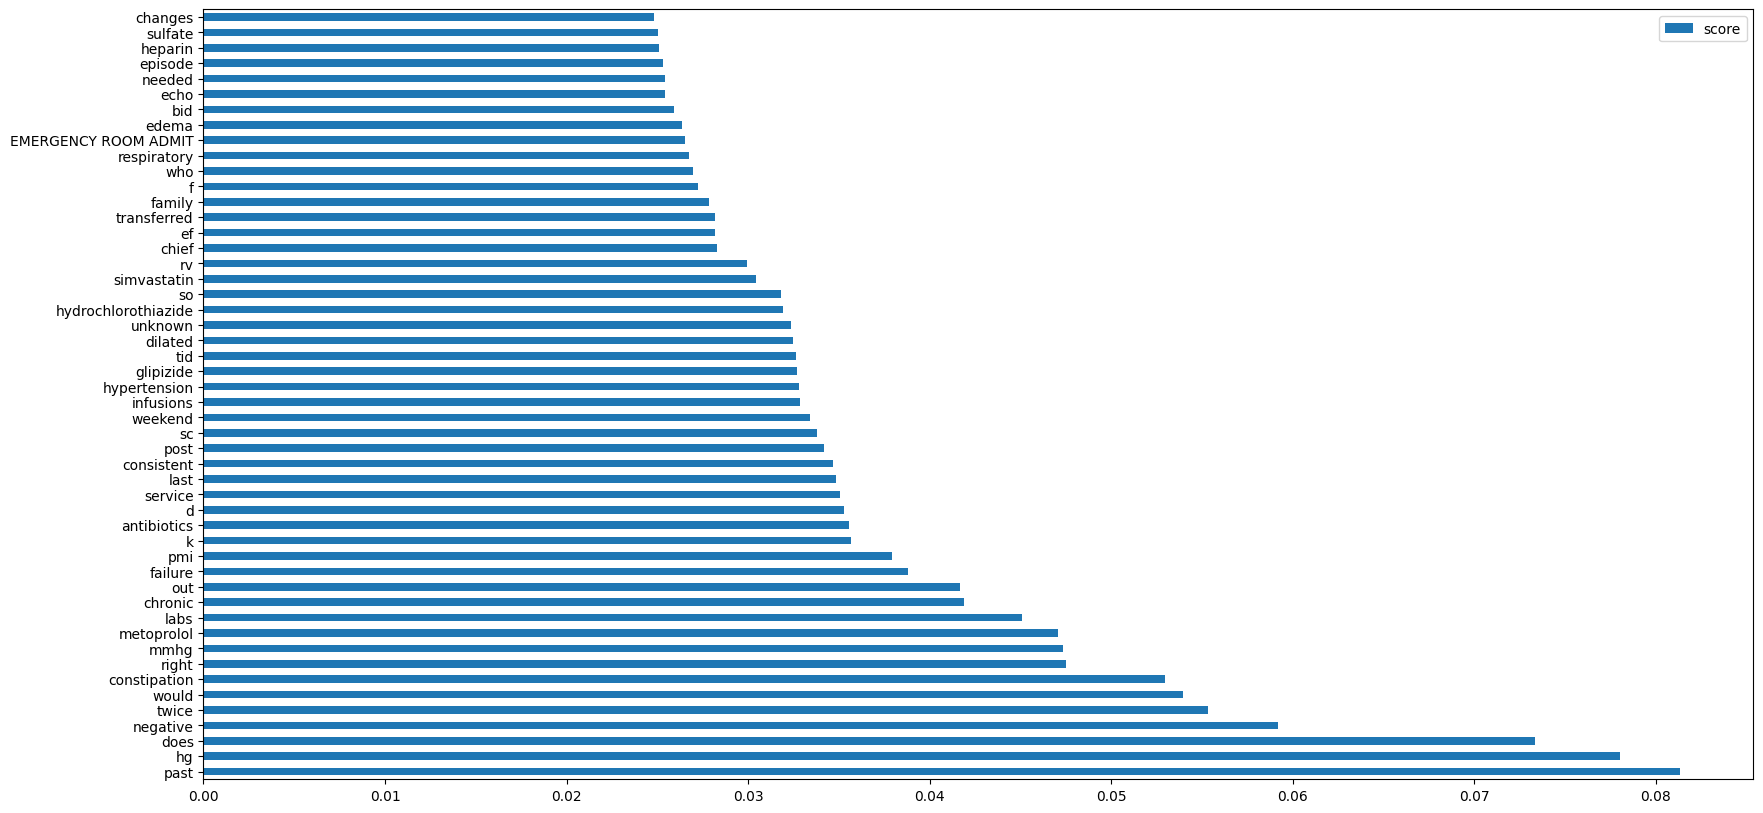

In [ ]:
# Coefficients and Odds Ratios
coefficients = logistic_model.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")

print(feature_importance.sort_values(by='Coefficient', ascending=False))
keys = list(feature_importance['Feature'])
values = list(feature_importance['Coefficient'])

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
_nooffeature = 50
data.nlargest(_nooffeature, columns="score").plot(kind='barh', figsize = (20,10))  

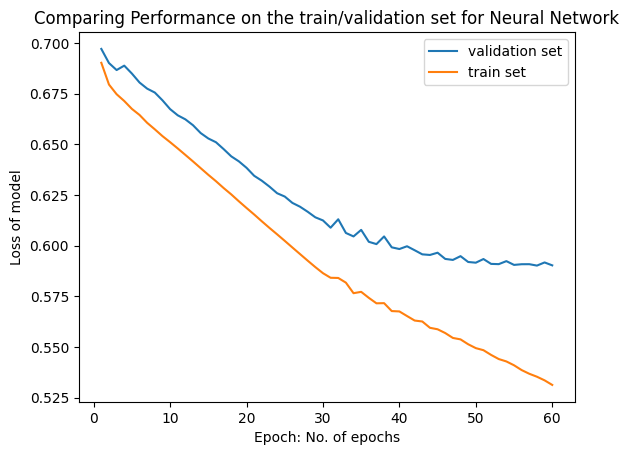

In [476]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE365DAYS']
randomstateno = 55
t0_train , t0_temp, t0Y_train, t0Y_temp = train_test_split(t0, Y, test_size=0.3, random_state=randomstateno)
t0_val , t0_test, t0Y_val, t0Y_test = train_test_split(t0_temp, t0Y_temp, test_size=0.5, random_state=randomstateno)


nmodel = NeuralNetworkNotes(n_h=70, noofepochs=60)
nmodel.fit(t0_train, t0Y_train, t0_val, t0Y_val)

model i : 0 	 loss:	 0.6608425378799438
model i : 1 	 loss:	 0.6284833550453186
model i : 2 	 loss:	 0.6736976504325867
model i : 3 	 loss:	 0.6360272765159607
model i : 4 	 loss:	 0.6506714820861816
model i : 5 	 loss:	 0.6548082828521729
model i : 6 	 loss:	 0.5801464915275574
model i : 7 	 loss:	 0.6768171787261963
model i : 8 	 loss:	 0.6202881932258606
model i : 9 	 loss:	 0.6116920709609985
model i : 10 	 loss:	 0.6957023739814758
model i : 11 	 loss:	 0.6307353973388672
model i : 12 	 loss:	 0.6770628094673157
model i : 13 	 loss:	 0.6661183834075928
model i : 14 	 loss:	 0.6762893795967102
model i : 15 	 loss:	 0.6343134045600891
model i : 16 	 loss:	 0.6847886443138123
model i : 17 	 loss:	 0.6425867080688477
model i : 18 	 loss:	 0.5855940580368042
model i : 19 	 loss:	 0.6550303101539612


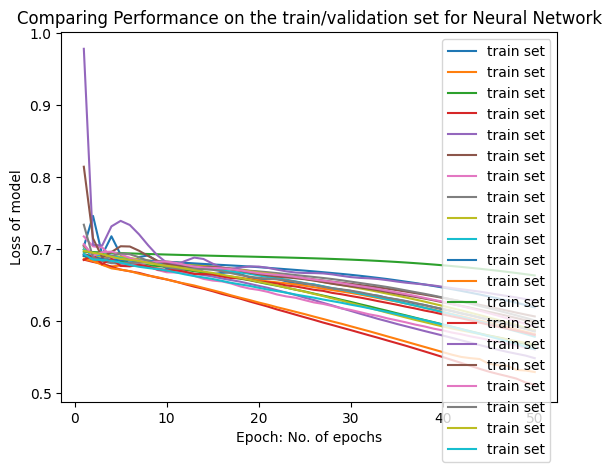

In [479]:
nmodel = None
currentbestloss = 100
for i in range(20):
    thisnmodel = NeuralNetworkNotes(n_h=100, noofepochs=50)
    thisnmodel.fit(t0_train, t0Y_train)
    thisloss = computevalloss(thisnmodel, t0_val, t0Y_val)
    print('model i : ' + str(i), '\t loss:\t', thisloss)
    if thisloss < currentbestloss:
        currentbestloss =  thisloss
        nmodel = thisnmodel

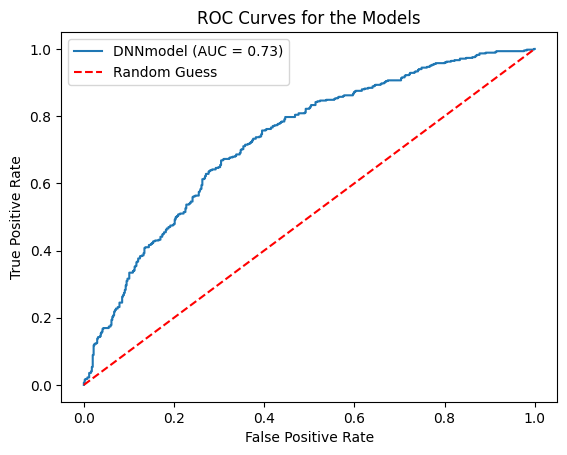

In [480]:

t0Y_predict = nmodel.predict_prob(t0_test)
fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

Percentage of the survival in 365 days:  0.4672427336999214
X_train:       abdominal  abnormal  abnormalities  above  acetaminophen  acute  \
4358          5        16             27     13              4     13   
1577         22        23             15      1              7      4   
1934          1         0              0      1              0      1   
5756          6        10              7      0              4     10   
2722          7         5              0      1              7      2   
...         ...       ...            ...    ...            ...    ...   
6077          2         4             23     17              8     61   
968           1         7              1      0              2      3   
4391         11         8              3     15              3      3   
4762          4         0              1      1              1      0   
4557         21        28             36     12              4      8   

      admission  admitted  af  after  ...  weeks  well

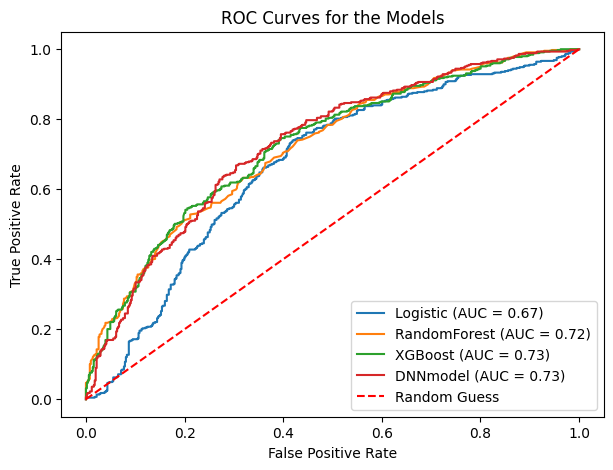

In [481]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE365DAYS']
print('Percentage of the survival in 365 days: ', sum(Y)/len(Y))
Y.reset_index(drop=True, inplace=True)

from sklearn.model_selection import train_test_split
X = textdataframe
# Y = kidneyfailurepatientinfo['SURVIVE30DAYS']
# Split data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=randomstateno)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=randomstateno)

print("X_train:", X_train)
print("X_val:", X_val)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_val:", y_val)
print("y_test:", y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=700, random_state=42)
# Train the model
xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_xgboost = xgmodel.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 
     'Logistic': y_pred_logistic, 
     'RandomForest': y_pred_rf,
     'XGBoost': y_pred_xgboost,})
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'XGBoost']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')


fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

======================== The followings are micellaneous =========================

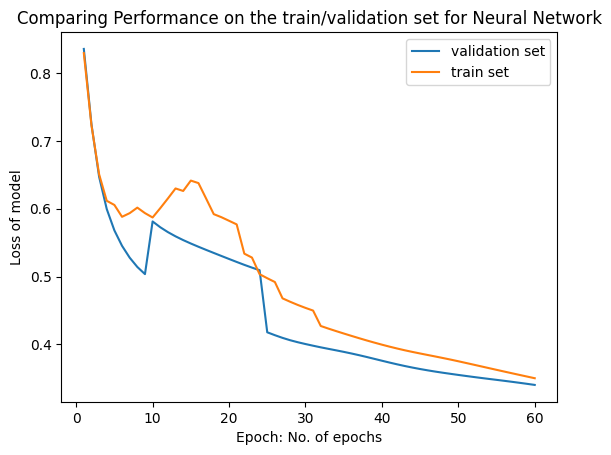

In [435]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE15DAYS']
randomstateno = 55
t0_train , t0_temp, t0Y_train, t0Y_temp = train_test_split(t0, Y, test_size=0.3, random_state=randomstateno)
t0_val , t0_test, t0Y_val, t0Y_test = train_test_split(t0_temp, t0Y_temp, test_size=0.5, random_state=randomstateno)


nmodel = NeuralNetworkNotes(n_h=70, noofepochs=60)
nmodel.fit(t0_train, t0Y_train, t0_val, t0Y_val)

model i : 0 	 loss:	 0.2952325642108917
model i : 1 	 loss:	 0.4265299141407013
model i : 2 	 loss:	 0.3102653920650482
model i : 3 	 loss:	 0.3403836488723755
model i : 4 	 loss:	 0.350569486618042
model i : 5 	 loss:	 0.30570265650749207
model i : 6 	 loss:	 0.7515338659286499
model i : 7 	 loss:	 0.2817884683609009
model i : 8 	 loss:	 0.5790511965751648
model i : 9 	 loss:	 0.3445679247379303
model i : 10 	 loss:	 0.30176088213920593
model i : 11 	 loss:	 0.32143911719322205
model i : 12 	 loss:	 0.27265456318855286
model i : 13 	 loss:	 0.33968761563301086
model i : 14 	 loss:	 0.32754412293434143
model i : 15 	 loss:	 0.3064986765384674
model i : 16 	 loss:	 0.3288709223270416
model i : 17 	 loss:	 0.330878347158432
model i : 18 	 loss:	 0.8775618076324463
model i : 19 	 loss:	 0.25840049982070923


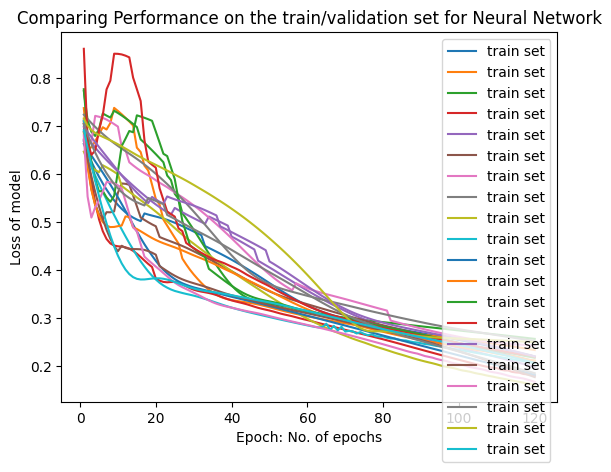

In [450]:
nmodel = None
currentbestloss = 100
for i in range(20):
    thisnmodel = NeuralNetworkNotes(n_h=100, noofepochs=120)
    thisnmodel.fit(t0_train, t0Y_train)
    thisloss = computevalloss(thisnmodel, t0_val, t0Y_val)
    print('model i : ' + str(i), '\t loss:\t', thisloss)
    if thisloss < currentbestloss:
        currentbestloss =  thisloss
        nmodel = thisnmodel

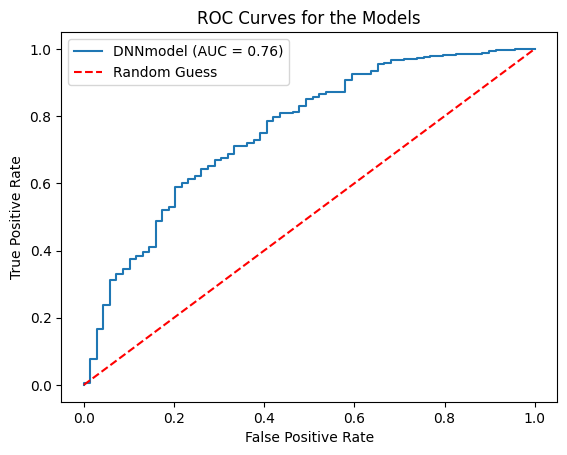

In [451]:

t0Y_predict = nmodel.predict_prob(t0_test)
fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

Percentage of the survival in 365 days:  0.9098193244304792
X_train:       abdominal  abnormal  abnormalities  above  acetaminophen  acute  \
4358          5        16             27     13              4     13   
1577         22        23             15      1              7      4   
1934          1         0              0      1              0      1   
5756          6        10              7      0              4     10   
2722          7         5              0      1              7      2   
...         ...       ...            ...    ...            ...    ...   
6077          2         4             23     17              8     61   
968           1         7              1      0              2      3   
4391         11         8              3     15              3      3   
4762          4         0              1      1              1      0   
4557         21        28             36     12              4      8   

      admission  admitted  af  after  ...  weeks  well

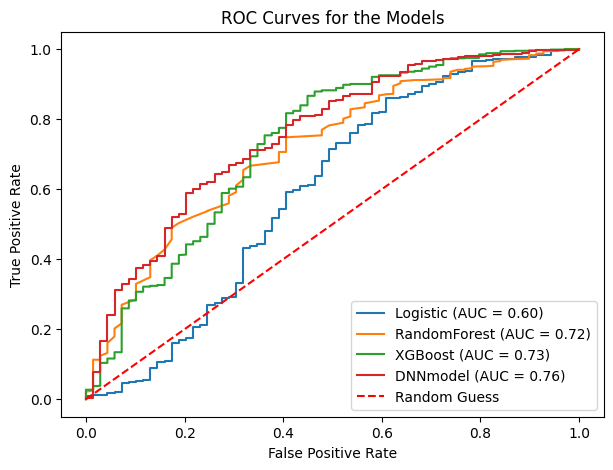

In [452]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE15DAYS']
print('Percentage of the survival in 365 days: ', sum(Y)/len(Y))
Y.reset_index(drop=True, inplace=True)

from sklearn.model_selection import train_test_split
X = textdataframe
# Y = kidneyfailurepatientinfo['SURVIVE30DAYS']
# Split data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=randomstateno)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=randomstateno)

print("X_train:", X_train)
print("X_val:", X_val)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_val:", y_val)
print("y_test:", y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=700, random_state=42)
# Train the model
xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_xgboost = xgmodel.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 
     'Logistic': y_pred_logistic, 
     'RandomForest': y_pred_rf,
     'XGBoost': y_pred_xgboost,})
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'XGBoost']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')


fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

In [453]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE60DAYS']
randomstateno = 55
t0_train , t0_temp, t0Y_train, t0Y_temp = train_test_split(t0, Y, test_size=0.3, random_state=randomstateno)
t0_val , t0_test, t0Y_val, t0Y_test = train_test_split(t0_temp, t0Y_temp, test_size=0.5, random_state=randomstateno)


nmodel = NeuralNetworkNotes(n_h=70, noofepochs=60)
# nmodel.fit(t0_train, t0Y_train, t0_val, t0Y_val)

model i : 0 	 loss:	 0.5308781862258911
model i : 1 	 loss:	 0.5118129849433899
model i : 2 	 loss:	 0.6040052771568298
model i : 3 	 loss:	 0.4858994483947754
model i : 4 	 loss:	 0.5319817662239075
model i : 5 	 loss:	 1.0055294036865234
model i : 6 	 loss:	 0.6335623264312744
model i : 7 	 loss:	 0.6780535578727722
model i : 8 	 loss:	 0.8602104783058167
model i : 9 	 loss:	 0.9604600071907043
model i : 10 	 loss:	 0.561327338218689
model i : 11 	 loss:	 0.989882230758667
model i : 12 	 loss:	 0.69914311170578
model i : 13 	 loss:	 0.5662316083908081
model i : 14 	 loss:	 0.5372433662414551
model i : 15 	 loss:	 0.6476658582687378
model i : 16 	 loss:	 0.5012461543083191
model i : 17 	 loss:	 0.5140007138252258
model i : 18 	 loss:	 0.551896870136261
model i : 19 	 loss:	 0.5558104515075684


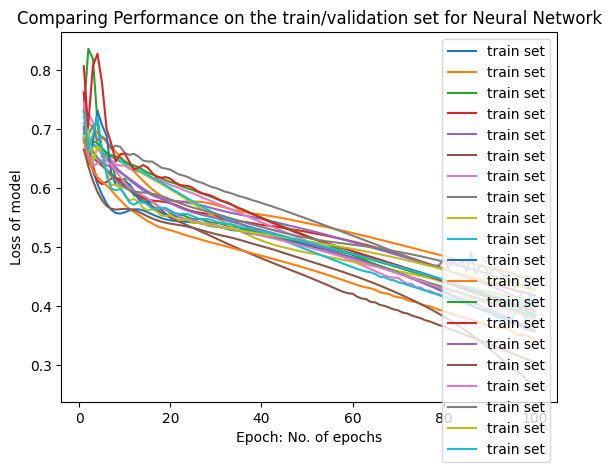

In [473]:
nmodel = None
currentbestloss = 100
for i in range(20):
    thisnmodel = NeuralNetworkNotes(n_h=100, noofepochs=100)
    thisnmodel.fit(t0_train, t0Y_train)
    thisloss = computevalloss(thisnmodel, t0_val, t0Y_val)
    print('model i : ' + str(i), '\t loss:\t', thisloss)
    if thisloss < currentbestloss:
        currentbestloss =  thisloss
        nmodel = thisnmodel

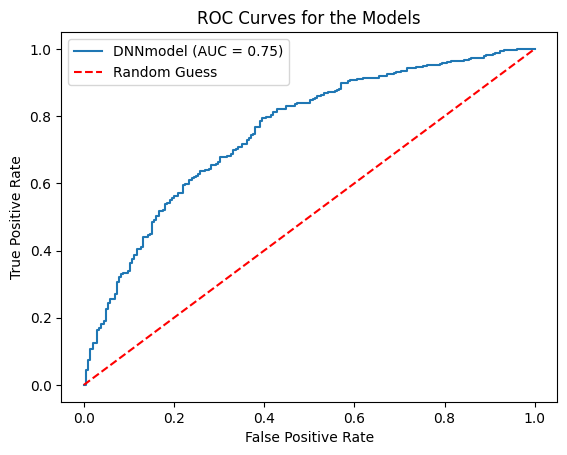

In [474]:

t0Y_predict = nmodel.predict_prob(t0_test)
fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

Percentage of the survival in 365 days:  0.7761194029850746
X_train:       abdominal  abnormal  abnormalities  above  acetaminophen  acute  \
4358          5        16             27     13              4     13   
1577         22        23             15      1              7      4   
1934          1         0              0      1              0      1   
5756          6        10              7      0              4     10   
2722          7         5              0      1              7      2   
...         ...       ...            ...    ...            ...    ...   
6077          2         4             23     17              8     61   
968           1         7              1      0              2      3   
4391         11         8              3     15              3      3   
4762          4         0              1      1              1      0   
4557         21        28             36     12              4      8   

      admission  admitted  af  after  ...  weeks  well

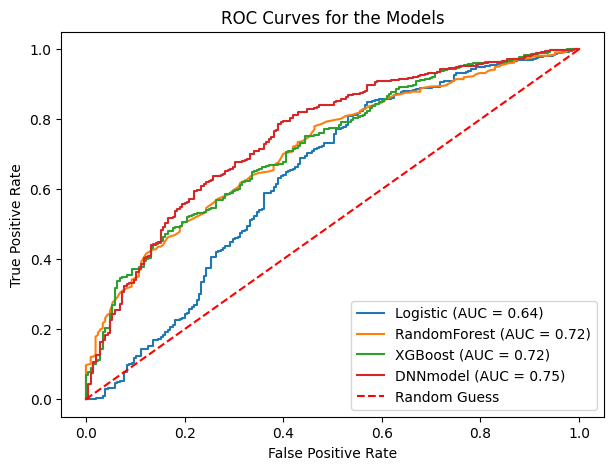

In [475]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE60DAYS']
print('Percentage of the survival in 365 days: ', sum(Y)/len(Y))
Y.reset_index(drop=True, inplace=True)

from sklearn.model_selection import train_test_split
X = textdataframe
# Y = kidneyfailurepatientinfo['SURVIVE30DAYS']
# Split data into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=randomstateno)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=randomstateno)

print("X_train:", X_train)
print("X_val:", X_val)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_val:", y_val)
print("y_test:", y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=700, random_state=42)
# Train the model
xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_xgboost = xgmodel.predict_proba(X_test)[:, 1]

test_df = pd.DataFrame(
    {'True': y_test, 
     'Logistic': y_pred_logistic, 
     'RandomForest': y_pred_rf,
     'XGBoost': y_pred_xgboost,})
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest', 'XGBoost']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')


fpr_nn, tpr_nn, _ = roc_curve(t0Y_test, t0Y_predict[:, 0])
roc_auc = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'DNNmodel (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for the Models')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim.adam
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
class DeepNN(nn.Module): 
    def __init__(self, n_in: int = 1, n_h: int = 1, n_output: int = 1):
        super().__init__() 
        self.layer1 = nn.Linear(in_features=n_in, out_features=n_h)
        self.layer2 = nn.Linear(n_h, n_h)
        self.layer3 = nn.Linear(n_h, n_h)
        self.layer4 = nn.Linear(3*n_h, n_output)
        self.relu = nn.ReLU()

    
    def forward(self, x):
        x0 = self.relu(self.layer1(x))
        x1 = self.relu(self.layer2(x0))
        x2 = self.relu(self.layer3(x1))
        xfinalinput = torch.concatenate((x0,x1,x2), dim=1)
        # print(xfinalinput.shape)
        xfinaloutput = nn.Sigmoid()(self.layer4(xfinalinput))
        return xfinaloutput


class NeuralNetwork(nn.Module):
    def __init__(self, n_h = 300, noofepochs = 250):
        super().__init__()
        self.model = None
        self.n_h = n_h
        self.noofepochs = noofepochs

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        x = torch.from_numpy(np.vstack(X_train.values + 0.0).astype(np.float32) )
        y = torch.from_numpy(np.vstack(y_train.values + 0.0).astype(np.float32) )
        x = x.to(device).float()
        y = y.to(device).float()
        
        if X_val is not None:
            x_val = torch.from_numpy(np.vstack(X_val.values + 0.0).astype(np.float32) )
            y_val = torch.from_numpy(np.vstack(y_val.values + 0.0).astype(np.float32) )
            x_val = x_val.to(device).float()
            y_val = y_val.to(device).float()

        n_in, n_h, n_out, batch_size = x.shape[1], self.n_h, 1, 128
        model2 = DeepNN(n_in=n_in, n_h=n_h,n_output=n_out)
        model2 = model2.to(device) 
        criterion = torch.nn.BCELoss()
        optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)  

        parameterlist = list(range(1, self.noofepochs+1))
        losstraining = []
        lossvalidation = []
        for epoch in range(self.noofepochs):  
            y_pred = model2(x)   
            loss = criterion(y_pred, y)  # 
            losstraining.append(loss.item())
            
            if X_val is not None:
                lossval = criterion(model2(x_val), y_val)
                lossvalidation.append(lossval.item())
                lossval = None
            # print('epoch: ', epoch, 'loss: ', loss.item())   
            optimizer.zero_grad()  
            loss.backward()   
            optimizer.step()   
        if X_val is not None:
            plt.plot(parameterlist, lossvalidation, label = 'validation set' )
        plt.plot(parameterlist, losstraining, label = 'train set')
        plt.xlabel('Epoch: No. of epochs')
        plt.ylabel('Loss of model')
        plt.title('Comparing Performance on the train/validation set for Neural Network')
        plt.legend()
        self.model = model2

    def predict_prob(self, X_test):
        x = torch.from_numpy(np.vstack(X_test.values + 0.0).astype(np.float32) )
        x = x.to(device).float()
        result = self.model.forward(x)
        return result.cpu().detach().numpy()


In [ ]:
def generateroc(X, Y):
    from sklearn.model_selection import train_test_split
    print('Percentage of the survival: ', sum(Y)/len(Y))

    # Split data into training and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

    # Split the temporary set into validation and test sets
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    from xgboost import XGBClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error' , random_state=42)
    # Train the model
    xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    y_pred = xgmodel.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print(f"Accuracy: {accuracy:.2f}")

    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    logistic_model = LogisticRegression(random_state=42)
    logistic_model.fit(X_train, y_train)

    random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42)
    random_forest_model.fit(X_train, y_train)

    nn_model = NeuralNetwork(n_h=200, noofepochs=40)
    nn_model.fit(X_train, y_train, X_val, y_val)


    y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
    y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]
    y_pred_xgboost = xgmodel.predict_proba(X_test)[:, 1]
    y_pred_nn = nn_model.predict_prob(X_test)[:, 0]


    test_df = pd.DataFrame(
        {'True': y_test, 
        'Logistic': y_pred_logistic, 
        'RandomForest': y_pred_rf,
        'XGBoost': y_pred_xgboost,
        'Neural Network': y_pred_nn})
    plt.figure(figsize=(7, 5))

    for model in ['Logistic', 'RandomForest', 'XGBoost', 'Neural Network']:
        fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for the Models')
    plt.legend()
    plt.show()

    

Percentage of the survival:  0.4672427336999214


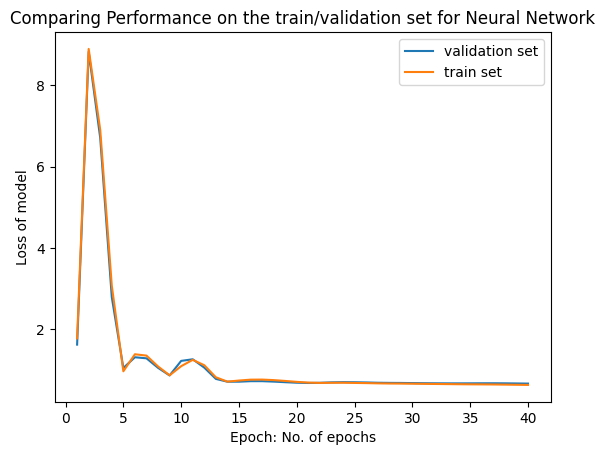

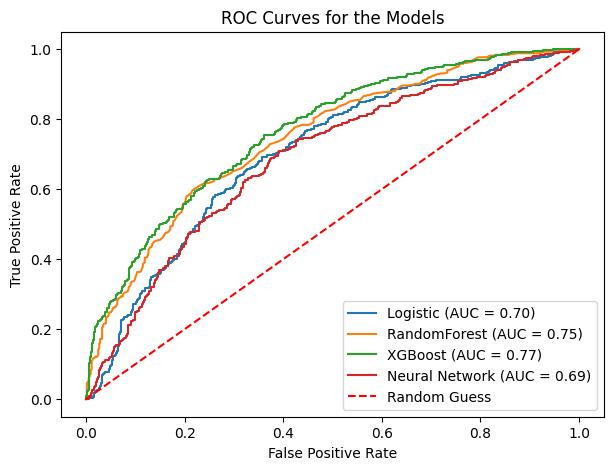

In [ ]:
X = dfwithtext
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE365DAYS']

generateroc(X, Y)

In [492]:
# notecategory
nmodel.model.layer0.weight

Parameter containing:
tensor([[ 0.2556,  0.0364, -0.1639,  0.0011,  0.0202,  0.2435,  0.2303,  0.0829,
         -0.1858,  0.1505, -0.0826,  0.0586, -0.1922, -0.0897, -0.1212]],
       device='cuda:0', requires_grad=True)

In [541]:
notecategory['average token lenght']

CATEGORY
Nursing/other         153.239299
Radiology             185.627330
Nursing               264.205731
Physician             751.901704
ECG                    30.287945
Discharge summary    1623.077069
Respiratory           145.720804
Echo                  320.111981
Nutrition             268.735229
General               204.143241
Rehab Services        403.750620
Social Work           306.476608
Case Management       144.008368
Pharmacy              229.481481
Consult               880.500000
Name: average token lenght, dtype: float64

In [490]:
notecategory.index

Index(['Nursing/other', 'Radiology', 'Nursing', 'Physician ', 'ECG',
       'Discharge summary', 'Respiratory ', 'Echo', 'Nutrition', 'General',
       'Rehab Services', 'Social Work', 'Case Management ', 'Pharmacy',
       'Consult'],
      dtype='object', name='CATEGORY')

In [495]:
def generateWeightdf(x):
    df0 = pd.DataFrame()
    df0['Category'] = notecategory.index
    df0['Weight'] = x[0].cpu().detach().numpy()
    return df0

generateWeightdf(nmodel.model.layer0.weight)


,Category,Weight
0,Nursing/other,0.255617
1,Radiology,0.036422
2,Nursing,-0.163920
3,Physician,0.001094
4,ECG,0.020193
5,Discharge summary,0.243545
6,Respiratory,0.230256
7,Echo,0.082943
8,Nutrition,-0.185751
9,General,0.150531


In [497]:
t0.shape

torch.Size([6365, 400, 15])

In [535]:
t0[0, :, : ]
def sensitivityanalysis(t0):
    n, f, c = t0.shape
    # print(n, f, c)
    result = 0.0*t0[0,:,:]
    
    thispatient = t0.float()
    addonetensor = thispatient*0
    thispatientoriginal = nmodel.model.forward(thispatient.float().to(device))
    # for j in range(f):
    #     print(j)
    for k in range(c):
        addonetensor[:, k] = 2.0
        thispatient1 = thispatient + addonetensor
        # print(j, k)
        thispatientnew = (nmodel.model.forward(thispatient1.float().to(device)))
        result[:, k] += (thispatientnew - thispatientoriginal).mean().item()
        addonetensor = thispatient*0
    return result
senresult = sensitivityanalysis(t0)


In [536]:
senresult[0, ]

tensor([ 2.2786e-03, -3.6153e-05,  1.7893e-03,  5.0608e-04, -2.6612e-03,
        -1.0457e-03, -3.4096e-04, -2.1855e-03, -1.0824e-03,  1.6484e-04,
         4.2978e-03,  1.9554e-03, -6.1776e-03,  9.1344e-04, -4.2565e-04])

In [566]:
ccarray = []
for i in range(15):
    ccarray.append(np.corrcoef( torch.sum(t0, (1))[:,i], Y)[0,1])

In [567]:

tempweight = generateWeightdf(nmodel.model.layer0.weight)
tempweight['Sensitivity'] = senresult[0, ]
tempweight['NormalizedSensitivity'] = tempweight['Sensitivity'].to_numpy() * notecategory['average token lenght'].to_numpy()
tempweight['Token length correlation with Y'] = ccarray
tempweight

,Category,Weight,Sensitivity,NormalizedSensitivity,Token length correlation with Y
0,Nursing/other,0.255617,0.002279,0.349164,-0.025601
1,Radiology,0.036422,-0.000036,-0.006711,-0.112848
2,Nursing,-0.163920,0.001789,0.472738,-0.078143
3,Physician,0.001094,0.000506,0.380522,-0.085293
4,ECG,0.020193,-0.002661,-0.080604,-0.034616
5,Discharge summary,0.243545,-0.001046,-1.697192,-0.228844
6,Respiratory,0.230256,-0.000341,-0.049685,-0.057995
7,Echo,0.082943,-0.002185,-0.699592,-0.076063
8,Nutrition,-0.185751,-0.001082,-0.290887,-0.064585
9,General,0.150531,0.000165,0.033651,-0.044324


In [ ]:
t0.shape

torch.Size([6365, 400, 15])

In [546]:
tempweight['Weight'].to_numpy() / notecategory['average token lenght'].to_numpy()

array([ 1.66809208e-03,  1.96208181e-04, -6.20426564e-04,  1.45551677e-06,
        6.66713231e-04,  1.50051534e-04,  1.58011626e-03,  2.59106901e-04,
       -6.91203083e-04,  7.37378319e-04, -2.04542989e-04,  1.91063196e-04,
       -1.33493153e-03, -3.90933869e-04, -1.37625974e-04])

In [537]:
tempmax = [0, 0]
tempmin = [0, 0]
for i in range(senresult.shape[0]):
    for j in range(senresult.shape[1]):
        if senresult[i, j] > tempmax[0]:
            tempmax[0] = senresult[i, j]
            tempmax[1] = (i, j)
        if senresult[i, j] < tempmin[0]:
            tempmin[0] = senresult[i, j]
            tempmin[1] = (i, j)
print(tempmax, tempmin)

[tensor(0.0043), (0, 10)] [tensor(-0.0062), (0, 12)]


In [527]:
vect.get_feature_names_out()[132]

'free'

In [ ]:
Y

0        True
1        True
2        True
3        True
4        True
        ...  
8859    False
8860    False
8863    False
8864    False
8866     True
Name: SURVIVE365DAYS, Length: 6365, dtype: bool

In [ ]:
t1 = X_train.values + 0.0
np.vstack(t1).astype(np.float32)

array([[-0.16087556,  0.        ,  1.        , ..., 14.        ,
        10.        , 11.        ],
       [ 0.96950835,  0.        ,  1.        , ...,  2.        ,
         9.        ,  4.        ],
       [-1.4537098 ,  0.        ,  1.        , ..., 10.        ,
         7.        ,  1.        ],
       ...,
       [ 0.87319845,  0.        ,  1.        , ..., 86.        ,
        13.        , 36.        ],
       [ 0.3315038 ,  0.        ,  1.        , ...,  2.        ,
         0.        ,  0.        ],
       [-1.8907787 ,  0.        ,  1.        , ...,  5.        ,
         2.        ,  0.        ]], shape=(4455, 474), dtype=float32)

In [ ]:
X

,ADMITAGE,ELECTIVE,EMERGENCY,URGENT,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,TRANSFER FROM OTHER HEALT,TRANSFER FROM SKILLED NUR,...,weeks,well,wenckebach,wheezing,when,who,will,without,would,years
0,-0.359684,False,True,False,False,True,False,False,False,False,...,32,2,25,14,12,0,44,48,36,5
1,-0.313463,False,True,False,False,True,False,False,False,False,...,21,1,44,43,38,0,84,55,73,5
2,-0.295864,False,True,False,False,True,False,False,False,False,...,10,0,12,17,3,0,20,16,20,3
3,-0.227596,False,True,False,False,True,False,False,False,False,...,8,10,11,0,2,0,9,42,0,0
4,-0.215606,False,True,False,False,True,False,False,False,False,...,33,7,166,8,111,0,58,47,20,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6360,-1.138479,False,True,False,True,False,False,False,False,False,...,3,1,0,0,2,0,1,7,0,0
6361,-1.134998,False,True,False,False,False,False,True,False,False,...,6,1,2,7,2,0,2,11,0,0
6362,0.364767,False,True,False,False,True,False,False,False,False,...,24,3,58,1,3,0,29,17,15,13
6363,-0.980863,False,True,False,True,False,False,False,False,False,...,2,4,0,17,8,8,14,9,0,0


In [ ]:
np.array(Y)

array([ True,  True,  True, ..., False, False,  True], shape=(6365,))

In [ ]:
from fvecs.featurevec import FeatureVec
RF_model = RandomForestClassifier(max_depth=10)
RF_model.fit( X,  np.array(Y))

fv = FeatureVec(mode='classify', 
                feature_names=X.columns,
                tree_generator=RF_model)
fv.fit(X, np.array(Y), restart=True)
fv.plot()

In [ ]:
X.index

RangeIndex(start=0, stop=6365, step=1)

In [ ]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE30DAYS']
Y.reset_index(drop=True, inplace=True)

In [ ]:
hospicesurvivecounter = 0
for i in X.index:
    if X['hospice'][i] > 0 and Y[i] > 0:
        hospicesurvivecounter+=1
hospicesurvivecounter / sum(X['hospice'] > 0)

0.36674259681093396

In [ ]:
dnrsurvivecounter = 0
for i in X.index:
    if X['dnr'][i] > 0 and Y[i] > 0:
        dnrsurvivecounter+=1
dnrsurvivecounter / sum(X['dnr'] > 0)

0.655838454784899

In [ ]:
Y = kidneyfailurepatientinfo[kidneyfailurepatientinfo['DISCHARGE_LOCATION'] != 'DEAD/EXPIRED']['SURVIVE365DAYS']
Y.reset_index(drop=True, inplace=True)

In [ ]:
hospicesurvivecounter = 0
for i in X.index:
    if X['hospice'][i] > 0 and Y[i] > 0:
        hospicesurvivecounter+=1
hospicesurvivecounter / sum(X['hospice'] > 0)

0.10250569476082004

In [ ]:
dnrsurvivecounter = 0
for i in X.index:
    if X['dnr'][i] > 0 and Y[i] > 0:
        dnrsurvivecounter+=1
dnrsurvivecounter / sum(X['dnr'] > 0)

0.25548726953467954

In [ ]:
parameterlist = [50,100,200,300,400,500,600,700,800,900,1000,1500]
accuracyvallist = []
accuracytrainlist = []
for parameter in parameterlist:
    print('n_estimators:\t', parameter)
    xgmodel = XGBClassifier(objective='binary:logistic', eval_metric='error', n_estimators=parameter, random_state=42)
    # Train the model
    xgmodel.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    y_pred = xgmodel.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    accuracytrainlist.append(accuracy)

    y_pred = xgmodel.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    accuracyvallist.append(accuracy)

n_estimators:	 50
Accuracy: 1.00
Accuracy: 0.69
n_estimators:	 100
Accuracy: 1.00
Accuracy: 0.70
n_estimators:	 200
Accuracy: 1.00
Accuracy: 0.70
n_estimators:	 300
Accuracy: 1.00
Accuracy: 0.71
n_estimators:	 400
Accuracy: 1.00
Accuracy: 0.71
n_estimators:	 500
Accuracy: 1.00
Accuracy: 0.71
n_estimators:	 600
Accuracy: 1.00
Accuracy: 0.71
n_estimators:	 700
Accuracy: 1.00
Accuracy: 0.72
n_estimators:	 800
Accuracy: 1.00
Accuracy: 0.72
n_estimators:	 900
Accuracy: 1.00
Accuracy: 0.72
n_estimators:	 1000
Accuracy: 1.00
Accuracy: 0.72
n_estimators:	 1500
Accuracy: 1.00
Accuracy: 0.71


In [ ]:
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy

1.0

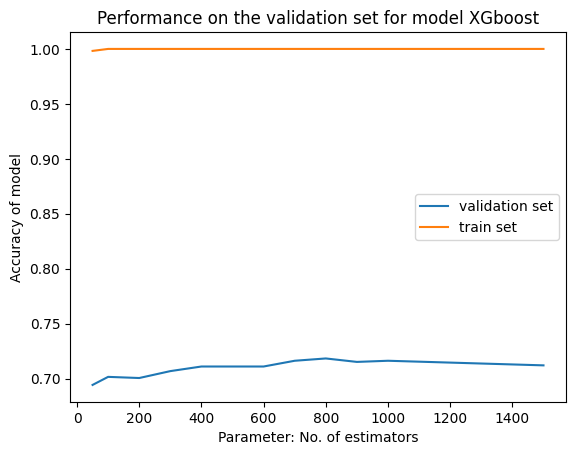

In [ ]:
plt.plot(parameterlist, accuracyvallist, label = 'validation set')
plt.plot(parameterlist, accuracytrainlist, label = 'train set' )
plt.xlabel('Parameter: No. of estimators')
plt.ylabel('Accuracy of model')
plt.title('Performance on the validation set for model XGboost')
plt.legend()

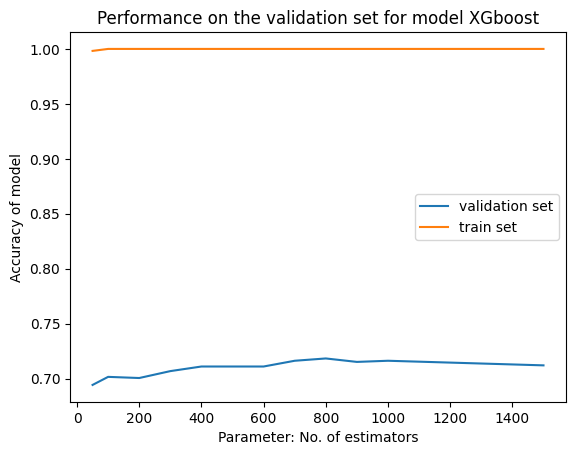

In [ ]:
plt.plot(parameterlist, accuracyvallist, label = 'validation set')
plt.plot(parameterlist, accuracytrainlist, label = 'train set' )
plt.xlabel('Parameter: No. of estimators')
plt.ylabel('Accuracy of model')
plt.title('Performance on the validation set for model XGboost')
plt.legend()

In [ ]:

parameterlist = [50,100,200,300,400,500,600,700,800,900,1000,1500]
accuracyvallist = []
accuracytrainlist = []
for parameter in parameterlist: 
    print('n_estimators:\t', parameter)
    random_forest_model = RandomForestClassifier(n_estimators=parameter, random_state=42)
    random_forest_model.fit(X_train, y_train)

    y_pred = random_forest_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    accuracytrainlist.append(accuracy)
    
    y_pred = random_forest_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    accuracyvallist.append(accuracy)

n_estimators:	 50
Accuracy: 1.00
Accuracy: 0.65
n_estimators:	 100
Accuracy: 1.00
Accuracy: 0.67
n_estimators:	 200
Accuracy: 1.00
Accuracy: 0.67
n_estimators:	 300
Accuracy: 1.00
Accuracy: 0.68
n_estimators:	 400
Accuracy: 1.00
Accuracy: 0.68
n_estimators:	 500
Accuracy: 1.00
Accuracy: 0.69
n_estimators:	 600
Accuracy: 1.00
Accuracy: 0.69
n_estimators:	 700
Accuracy: 1.00
Accuracy: 0.68
n_estimators:	 800
Accuracy: 1.00
Accuracy: 0.68
n_estimators:	 900
Accuracy: 1.00
Accuracy: 0.68
n_estimators:	 1000
Accuracy: 1.00
Accuracy: 0.68
n_estimators:	 1500
Accuracy: 1.00
Accuracy: 0.68


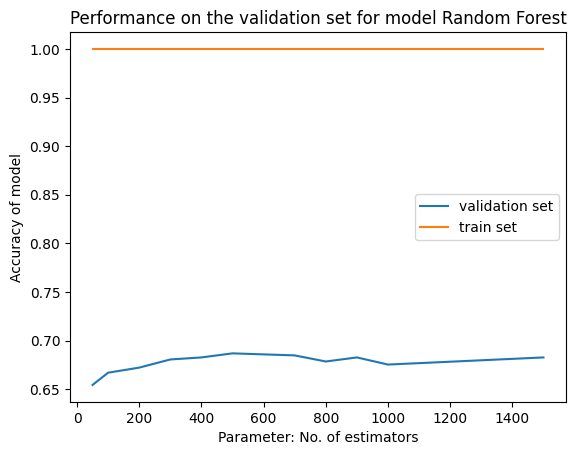

In [ ]:
plt.plot(parameterlist, accuracyvallist, label = 'validation set')
plt.plot(parameterlist, accuracytrainlist, label = 'train set' )
plt.xlabel('Parameter: No. of estimators')
plt.ylabel('Accuracy of model')
plt.title('Performance on the validation set for model Random Forest')
plt.legend()

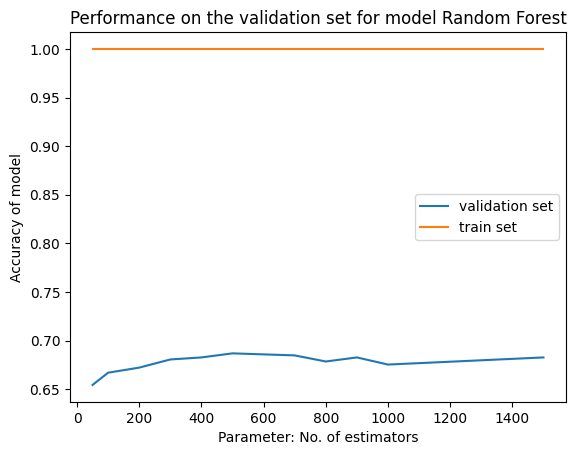

In [ ]:
plt.plot(parameterlist, accuracyvallist, label = 'validation set')
plt.plot(parameterlist, accuracytrainlist, label = 'train set' )
plt.xlabel('Parameter: No. of estimators')
plt.ylabel('Accuracy of model')
plt.title('Performance on the validation set for model Random Forest')
plt.legend()

In [ ]:
noteeventsdf

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...
...,...,...,...,...,...,...,...,...,...,...,...
2083175,2070657,31097,115637.0,2132-01-21,2132-01-21 03:27:00,2132-01-21 03:38:00,Nursing/other,Report,17581.0,NaN,NPN\n\n\n#1 Infant remains in RA with O2 sats...
2083176,2070658,31097,115637.0,2132-01-21,2132-01-21 09:50:00,2132-01-21 09:53:00,Nursing/other,Report,19211.0,NaN,"Neonatology\nDOL #5, CGA 36 weeks.\n\nCVR: Con..."
2083177,2070659,31097,115637.0,2132-01-21,2132-01-21 16:42:00,2132-01-21 16:44:00,Nursing/other,Report,20104.0,NaN,Family Meeting Note\nFamily meeting held with ...
2083178,2070660,31097,115637.0,2132-01-21,2132-01-21 18:05:00,2132-01-21 18:16:00,Nursing/other,Report,16023.0,NaN,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...


In [ ]:
textjoint = ' '.join(noteeventsdf[noteeventsdf['HADM_ID'] == 167853]['TEXT'])

In [ ]:
# tokenizer_better(textjoint)

In [ ]:
kidneypatienttext = \
   noteeventsdf[noteeventsdf['SUBJECT_ID'].isin(diagnoses_kidney_failure['SUBJECT_ID'])]
kidneypatienttext

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
10,184,28063,121936.0,2125-02-16,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2125-2-9**] D...
11,185,1136,139574.0,2192-05-23,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2192-4-19**] ...
...,...,...,...,...,...,...,...,...,...,...,...
2066675,701664,77163,120851.0,2175-10-10,2175-10-10 06:30:00,2175-10-10 06:56:15,Physician,Physician Resident Progress Note,19796.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...
2066676,701670,59113,169374.0,2194-11-04,2194-11-04 07:06:00,2194-11-04 07:06:25,Physician,Physician Resident Progress Note,20449.0,NaN,Chief Complaint:\n 24 Hour Events:\n -fax ...
2066677,701673,72678,134826.0,2169-09-26,2169-09-26 07:14:00,2169-09-26 07:14:26,Physician,Physician Resident Progress Note,16654.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...
2066678,701674,72678,134826.0,2169-09-26,2169-09-26 07:14:00,2169-09-26 07:15:51,Physician,Physician Resident Progress Note,16654.0,NaN,TITLE:\n Chief Complaint:\n 24 Hour Events...
